# **Telecomunication Company Analysis : Customer Churn**

## **1. Business Problem Understanding**

### **Context**  
Sebuah perusahaan yang telah lama bergerak di industri Telekomunikasi memahami bahwa persaingan semakin ketat dalam beberapa tahun terakhir. Beberapa perusahaan pesaing melakukan merger satu sama lain ataupun mengalami akuisisi oleh perusahaan internasional dengan tambahan modal yang sangat besar. perusahaan pesaing lama namun dengan modal yang lebih besar dari sebelumnya mulai melakukan perbaikan layanan dengan memperluas dan memperkuat jaringan koneksinya. Dengan kualitas layanan yang bersaing tersebut, mereka mulai menawarkan tarif langganan yang lebih murah. Perusahaan memiliki keunggulan yaitu jaringan yang dimiliki lebih tersebar hingga ke pelosok negeri.

Perusahaan tersebut ingin memprediksi karakteristik *customer* seperti apa yang akan berhenti langganan (*churn*). Sebagai seorang *Data Scientist* kita diminta untuk membuat model *Machine Learning* yang sesuai agar jumlah *customer churn* dapat dikurangi.

Target :

0 : Tidak Berhenti Langganan

1 : Berhenti Langganan (Churn)

### **Problem Statement**

Pelanggan berhenti langganan (*churn*) merupakan masalah yang dapat menyebabkan kerugian apabila jumlahnya sangat tinggi. Masalah tersebut dapat juga dijadikan sebagai indikator bahwa perusahaan kalah dalam bersaing dengan kompetitor untuk menawarkan layanan yang optimal kepada pelanggan. 

Mendapatkan pelanggan baru akan memerlukan *cost* yang tidak sedikit, seperti *cost* untuk marketing, potongan harga dan lain-lain. Sebagai contoh biaya akuisi untuk 1 orang pelanggan dari perusahaan asal Amerika [Sprint PCS](https://www.entrepreneur.com/growing-a-business/how-much-did-that-new-customer-cost-you/225415) adalah $315. Menurut hasil survey yang dilakukan oleh website [berikut](https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value) *cost* untuk mendapatkan pelanggan baru adalah 5 kali lebih besar daripada *cost* untuk mempertahankan pelanggan lama. Artinya, untuk mempertahankan 1 orang pelanggan hanya membutuhkan 1/5 dari biaya akuisisi yaitu $63. Oleh karena itu, perusahaan harus berfokus untuk menurunkan persentase *churn* dengan meningkatkan retensi pada pelanggan lama agar kerugian dari kehilangan pelanggan dapat diminimalisir.



### **Goals**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan berhenti berlangganan (*churn*) atau tidak, sehingga perusahaan dapat memfokuskan *strategy* bisnisnya untuk menjaga retensi pelanggan.

Dan juga, perusahaan ingin mengetahui faktor/variabel apa yang membuat seorang pelanggan tetap bertahan, sehingga mereka dapat membuat rencana yang lebih baik dalam membuat program-program layanan untuk pelanggan supaya tingkat (*churn*) dapat berukurang.



### **Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang berhenti langganan (*churn*) dan tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan pindah ke provider lain atau tidak.

### **Metric Evaluation**

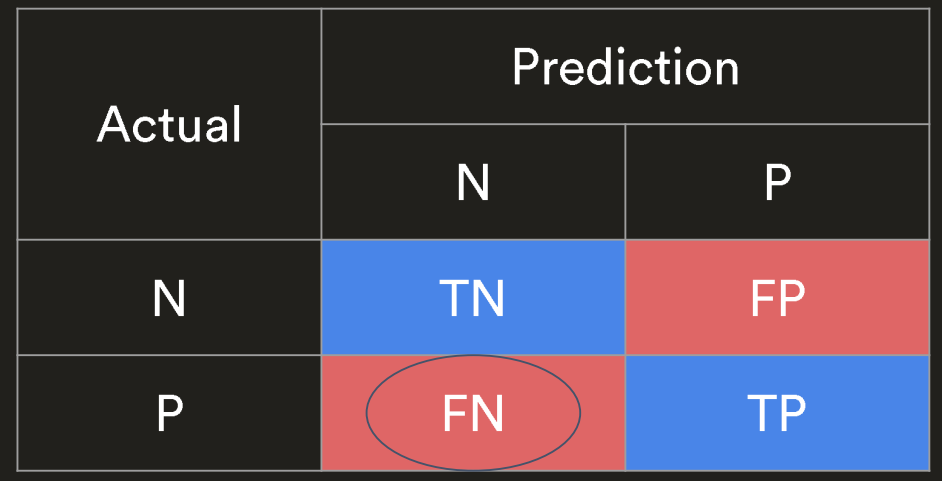

Target :
- 0 : Tidak berhenti berlangganan
- 1 : Berhenti berlangganan (*churn*)


Type 1 error : False Positive (pelanggan yg diprediksi *churn* namun aktual tidak *churn*)
Konsekuensi: kehilangan calon pelanggan loyal

Type 2 error : False Negative (pelanggan yg diprediksi tidak *churn* namun aktual *churn*) 
Konsekuensi: kerugiaan akibat biaya untuk mempertahankan pelanggan (retensi) tidak tepat sasaran

Sesuai dengan pernyataan problem statement sebelumnya dan beberapa sumber yang saya peroleh dari internet bahwa:
 
- Menurut sumber yang saya peroleh bahwa *customer lifetime period* berada pada kisaran [12-24 Bulan](https://www.pm.lth.se/fileadmin/pm/Exjobb/Filer_fram_till_foerra_aaret/Exjobb_2013/Flordahl___Friberg/CLV_ERICSSON_Flordal_Friberg.pdf). Menurut *common sense* sebagai pelanggan salah satu penyedia internet di Indonesia, kontrak minimum berlangganan ada pada jangka waktu 1 tahun (12 bulan). Maka dalam perhitungan nantinya saya akan menggunakan *customer lifetime period* 12 months.
- Biaya untuk *customer accuistion* pelanggan sebesar $315/12 months = $26.25/month.
- Untuk mempertahankan 1 orang pelanggan hanya membutuhkan 1/5 dari biaya *customer accuistion* yaitu $5.25/month.
- Rata-rata *monthly* charge untuk pelanggan *telco customer* yaitu [$64.76](https://www.analyticsvidhya.com/blog/2022/01/churn-analysis-of-a-telecom-company/).

Maka dapat kita simulasikan perhitungan berikut:
- Jika kita lebih memfokuskan prediksi untuk memperkecil error False Positif kita akan mencegah perusahaaan mengalami potensi kerugian sebesar $64.76 + $5.25 = $70.01/month per pelanggan.
- Jika kita lebih memfokuskan prediksi untuk memperkecil error False Negatif kita akan mencegah perusahaaan mengalami potensi kerugian sebesar $64.76 + $26.25 + $5.25 = $96.26/month per pelanggan.


Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi customer berhenti langganan (*churn*) dari perusahaan tersebut. Meminimalisasi prediksi **False Negative** (pelanggan yg diprediksi tidak *churn* namun aktual *churn*) menjadi fokus utama kita. Maka metric utama yang akan kita gunakan adalah f beta score 2 karena kita menganggap **Recall** lebih penting daripada **Precision**. Dengan kata lain kita lebih fokus untuk memperkecil error false negatif alih-alih false positif.

## **2. Data Understanding**

### **Import Library**

In [2]:
# Library
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest

# Feature Engineering
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Scorer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer
# Imbalance Dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Load Dataset**

Dataset diperoleh dari link [berikut](https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp)

In [3]:
df = pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### **Menampilkan Informasi Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
df.duplicated().sum()

77

Dataset yang kita miliki memiliki informasi sebagai berikut :

- Jumlah baris sebanyak 4930 baris
- Terdapat 10 kolom
- Type data sudah sesuai
- Pelanggan yang berhenti berlangganan (Yes|No) adan pada kolom `Churn`
- Servis atau layanan yang dimiliki customer ada pada kolom `Online Security`, `Online Backup`, `Internet Service`, `Device Protection`, `Tech Support`
- Informasi demografi mengenai apakah pelanggan memiliki tanggungan ada pada kolom `Dependants`
- Informasi akun pelanggan `Tenure`, `Contract`, `PaperlessBilling`, `MonthlyCharges`

Berikut adalah informasi data type dari setiap *attribute* beserta deskripsinya :

| Attribute | Data Type | Description |
| --- | --- | --- |
| Dependents | 'Object' | Whether the customer has dependents : Yes or No. Dependents could be children, parents, grandparents, etc. |
| tenure | Integer | Number of months the customer has stayed with the company|
| OnlineSecurity | 'Object' | Whether the customer has online security or not |
| OnlineBackup | 'Object' | Whether the customer has online backup or not |
| InternetService | 'Object' | Whether the client is subscribed to Internet service |
| DeviceProtection | 'Object' | Whether the client has device protection or not |
| TechSupport | 'Object' | Whether the client has tech support or not |
| Contract | 'Object' | Type of contract according to duration |
| PaperlessBilling | 'Object' | Bills issued in paperless form |
| MonthlyCharges | Float | Amount of charge for service on monthly bases |
| Churn | 'Object' | Yes = the customer left the company this period. No = the customer remained with the company |

### **Unique Values**

In [5]:
pd.set_option('display.max_colwidth', None)
df_unique=pd.DataFrame(
    df.nunique()).reset_index().rename(columns={'index':'Column Name',0:'Number of Unique'}
                                       )
df_unique['Unique Values']=[df[i].unique() for i in df]

df_unique

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


### **Note**

Dari tahapan *Data Understanding* ini dapat diketahui bahwa :

- Type data dari setiap *attribute* sudah sesuai.
- Tidak terdapat *missing values*.
- Terdapat 77 data duplikat.
- Terdapat 2 kolom Numerikal yaitu, `Tenure` dan `MonthlyCharges`.
- Terdapat 7 kolom Kategorikal yaitu, `Dependents, Online Security, Online Backup, Internet Service, Device Protection, Tech Support, Contract`, dan `PaperlessBilling`.
- Kolom `Dependants` dan `PaperlessBilling` memiliki 2 *unique values* (Yes | No).
- Kolom `InternetService` berisi pilihan (DSL | No | FiberOptic).
- Kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` berisi pilihan (Yes | No | No internet service), pada tahapan *pre-processing* 'No internet service' akan diubah menjadi 'No' karena keduanya memiliki makna yang setara.

## **3. Exploratory Data Analysis**

### **A. Categorical Features**

##### **Descriptive Statistics**

In [6]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Berdasarkan data yang kita peroleh untuk *feature* `Dependents`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` nilai yang paling sering muncul adalah 'No'. Artinya kebanyakan pelanggan tidak menggunakan layanan servis tambahan dan mayoritas pelanggan tidak memiliki tanggungan. Sedangkan untuk `Contract` kebanyakan pelanggan cenderung menggunakan tagihan *Month-to-month* dan internet service yang digunakan adalah *fiber optic*.

##### **Proporsi Feature Kategorikal Terhadap *Value***

In [19]:
cat_feature = df.describe(include='object').columns

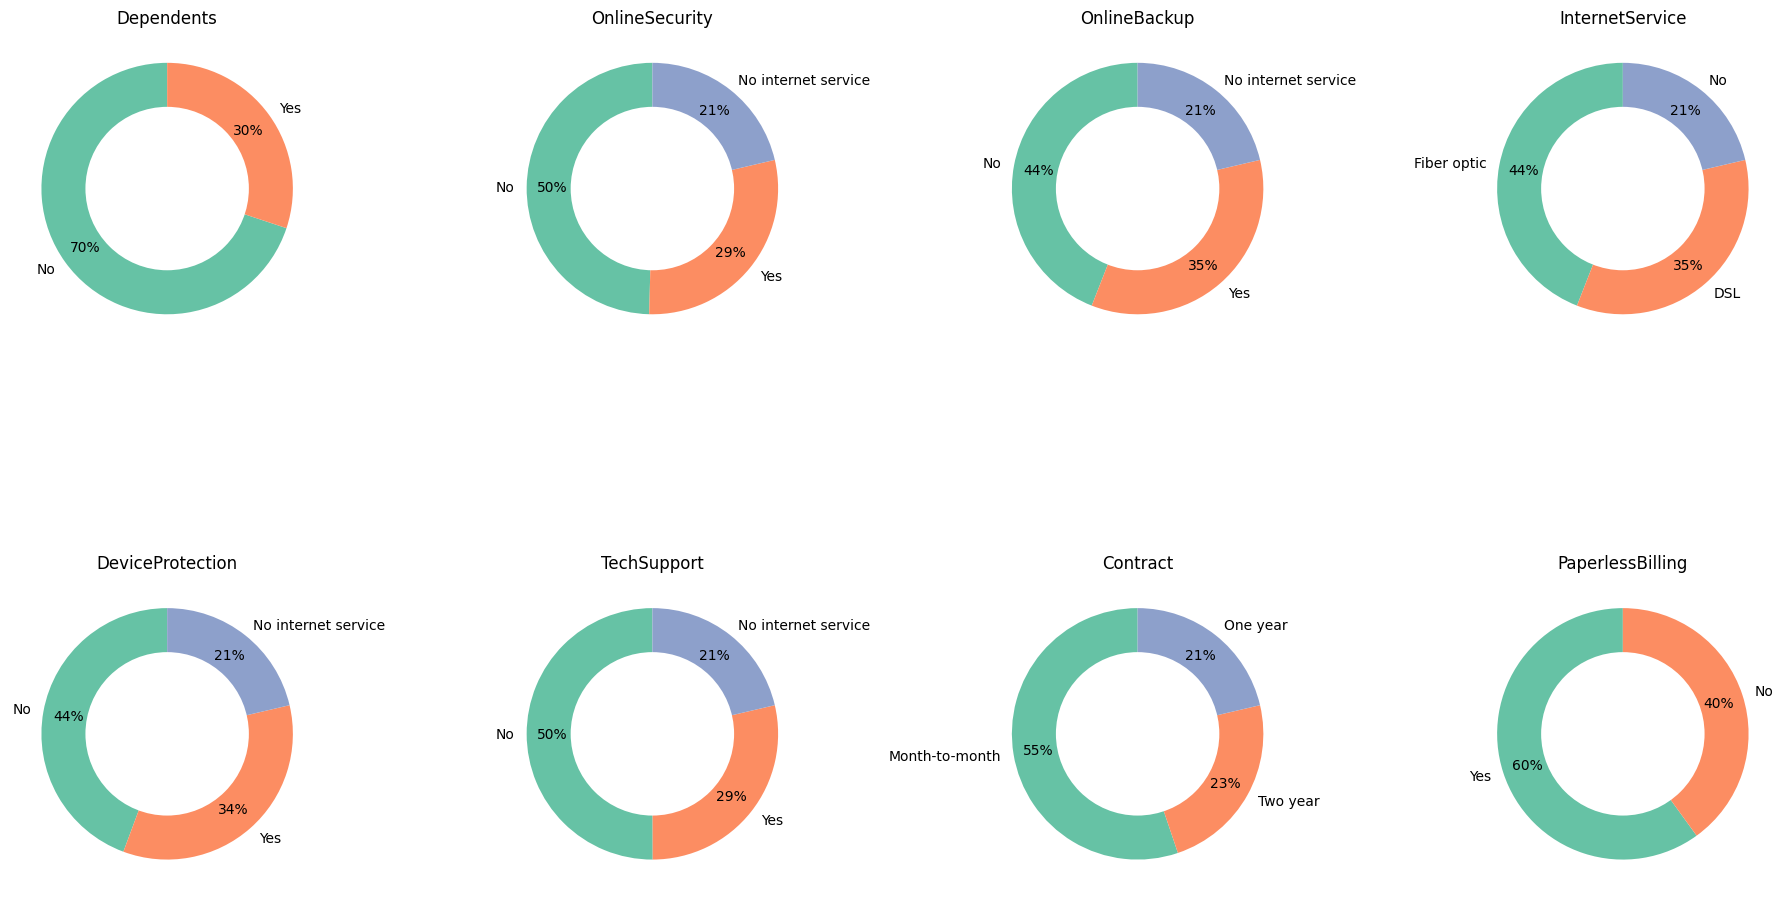

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12)) 

for i, ax in zip(cat_feature, axes.flatten()):
    data_values = df[i].value_counts()
    ax.pie(x=data_values, labels=data_values.index, autopct='%1.0f%%', startangle=90, colors=sns.color_palette('Set2'), pctdistance=0.80)
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    ax.add_artist(hole)
    ax.set_title(f'{i}', size=12)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi persentase diatas dapat diketahui bahwa :
- Mayoritas pelanggan (**70%**) tidak memiliki `Dependents` (tanggungan).
- 79% Pelanggan menggunakan layanan internet dengan mayoritas menggunakan jaringan Fiber Optic.
- **55%** pelanggan menggunakan tipe `Contract` *Month-to-month*.
- Mayoritas pelanggan tidak menggunakan layanan tambahan seperti `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`.
- Pelanggan lebih suka menggunakan `PaperlessBilling` (**60%**).

#### **B. Numerical Features**

##### **Descriptive Statistics**

In [8]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Berdasarkan descriptive statistics untuk kolom numerical dapa diketahuhi bahwa :

`tenure` :
- Rerata pelanggan berlangganan selama 32 bulan.
- Pelanggan yang paling lama berlangganan adalah 72 bulan.

`MonthlyCharges` :
- Min *Monthly Charges* yang dikeluarkan pelanggan adalah $18.8
- Rerata *Monthly Charges* yang dikeluarkan pelanggan adalah $64.88
- Max *Monthly Charges* yang dikeluarkan pelanggan adalah $118.65

##### **Cek Distribusi Data**

In [16]:
numerical_features = df.describe().columns
numerical_features

Index(['tenure', 'MonthlyCharges'], dtype='object')

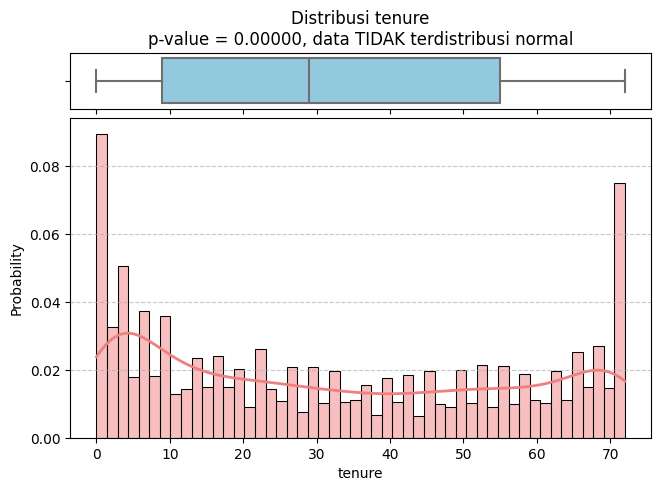

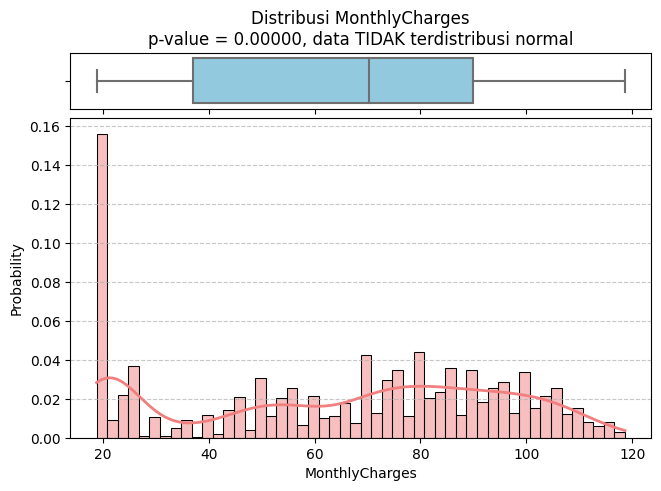

In [120]:
for kolom in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    # Melakukan uji normalitas
    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05:
        distribusi = f'p-value = {pvalue:.5f}, data terdistribusi normal'
    else:
        distribusi = f'p-value = {pvalue:.5f}, data TIDAK terdistribusi normal'

    # Menambahkan judul dengan informasi uji normalitas
    ax1.set_title(f"Distribusi {kolom}\n{distribusi}", color="black")
    
    # Mengatur warna pada boxplot
    sns.boxplot(x=df[kolom], ax=ax1, color='skyblue')
    ax1.set(xlabel="")

    # Mengatur palet warna dan elemen desain pada histogram
    sns.histplot(data=df[kolom], ax=ax2, stat="probability", kde=True, bins=50, color='lightcoral', line_kws={'linewidth': 2})

    # Menampilkan grid lines pada histogram
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


##### **Cek Koreleasi Antara Feature Numerikal**

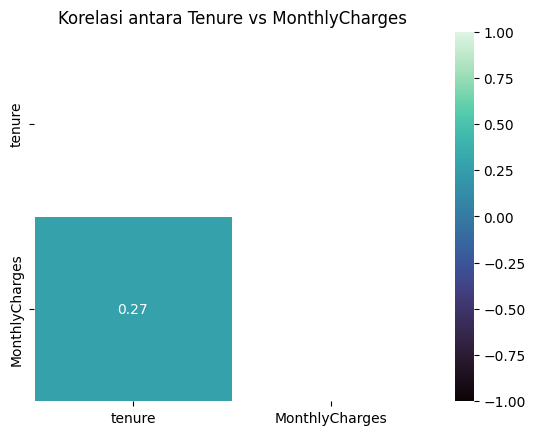

In [13]:
num_corr = df.corr(method='spearman', numeric_only=True)
cmap = sns.color_palette("mako", as_cmap=True)
matrix = np.triu(num_corr)
sns.heatmap(num_corr, annot=True, cmap=cmap, linewidths=.5, fmt=".2f", vmin=-1, vmax=1, mask=matrix)
plt.title("Korelasi antara Tenure vs MonthlyCharges")

plt.show()


Berdasarkan analisis diatas dapat diketahui bahwa:
- Numerikal Features `Tenure` dan `MonthlyCharges` tidak terdistribusi normal, terlihat dari kurva distribusi histplot dan uji normalitas yang kita lakukan.
- Terlihat dari grafik boxplot diatas, tidak terdapat outlier pada 2 data tersebut.
- Dari visualisasi heatmap kedua features memiliki korelasi *weak* positif  sebesar 0.27

## **4. Data Cleaning**

### **A. Data Cleaning**

##### **Cek Missing Values**

In [7]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Data tidak terdapat *missing value* sehingga tidak perlu dilakukan *handling*.

##### **Cek Duplikat**

In [8]:
df.shape

(4930, 11)

In [9]:
df.duplicated().sum()

77

In [72]:
df_clean = df.drop_duplicates()

In [73]:
df_clean.shape

(4853, 11)

Dari **4930** data terdapat **77** data yang duplikat. Setelah dilakukan drop pada data duplikat jumlah baris berkurang menjadi **4853**.

##### **Replace Value**

Pada tahap Data Understanding, teridentifikasi bahwa kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` berisi opsi (Yes | No | No internet service). Penting untuk dicatat bahwa opsi 'No' dan 'No internet service' sebetulnya memiliki makna yang setara. Hal ini disebabkan oleh fakta bahwa ketika pelanggan tidak berlangganan layanan internet, maka mereka tidak membutuhkan fitur-fitur tersebut. Oleh karena itu, pada tahap ini, dilakukan penyetaraan nilai 'No' dan 'No internet service' untuk konsistensi data.

In [74]:
df_clean = df_clean.replace('No internet service','No')

In [13]:
service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

In [14]:
listItem = []
for col in service :
 
    listItem.append( [col, df_clean[col].nunique(), df_clean[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,OnlineSecurity,2,"[No, Yes]"
1,OnlineBackup,2,"[No, Yes]"
2,DeviceProtection,2,"[Yes, No]"
3,TechSupport,2,"[Yes, No]"


##### **Handling Outliers**

Pada tahapan EDA teridentifikasi bahwa tidak terdapat outlier pada data numerikal. Namun, kita akan mencoba memisahkan tiap kolom numerikal berdasarkan `Churn` (Yes|No) apakah terdapat outlier pada setiap kategori `Churn`.

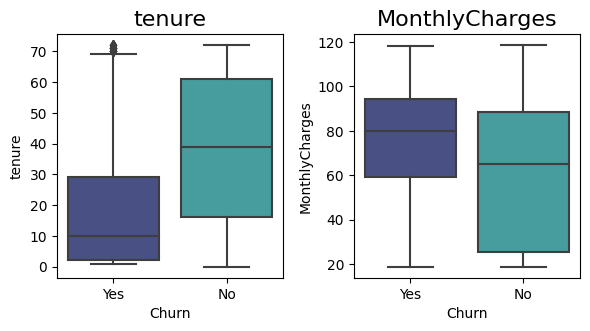

In [75]:
plt.figure(figsize=(6, 6), facecolor='white')
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=df_clean, palette='mako');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

Sejumlah data teridentifikasi berada di atas upper fence. Untuk mendapatkan gambaran yang lebih detail, kita akan menghitung jumlah pasti data outlier pada kolom `tenure` khusus untuk kategori `Churn` yang bernilai Yes. Fenomena ini perlu dianalisis lebih lanjut untuk memahami karakteristik pelanggan dengan `tenure` di atas 69 bulan namun masih memilih untuk berhenti langganan. Oleh karena itu, kami akan mempertahankan data *outlier* tersebut dan mengikutsertakannya dalam pemodelan, sehingga model dapat memahami pola perilaku pelanggan tersebut.

## **5. Data Analysis**

### **Categorical Variables vs Target**

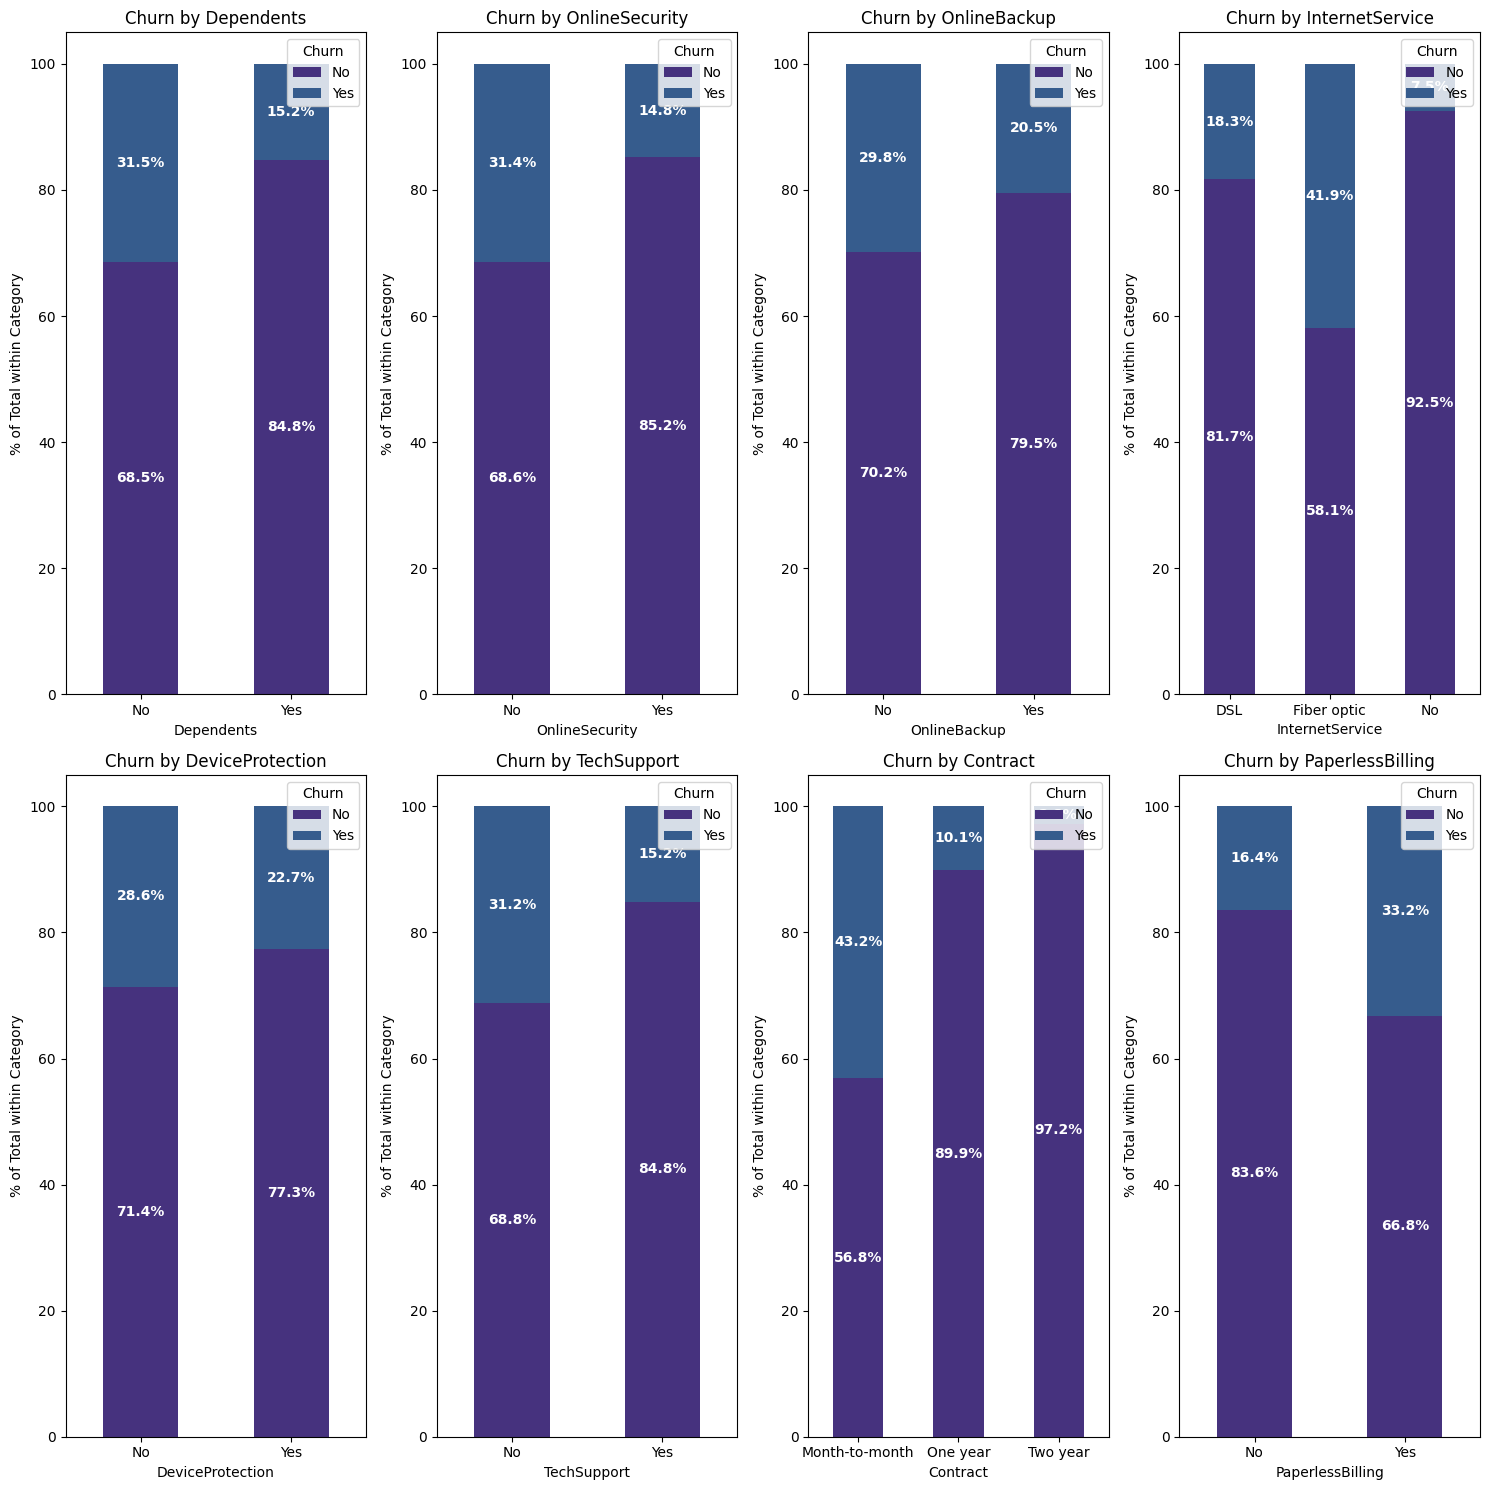

In [21]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(cat_feature[:-1], start=1):
    plt.subplot(2, 4, i)
    
    # Membuat crosstab dan menghitung jumlah dari setiap kategori berdasarkan Churn
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'])
    
    # Menghitung persentase dari setiap kategori
    percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    
    # Plot stacked bar chart
    sns.set_palette("viridis")
    percentages.plot(kind='bar', stacked=True, ax=plt.gca())
    
    # Annotate persentase
    for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        plt.gca().annotate(f'{height:.1f}%', (x + width/2, y + height/2), 
                           ha='center', va='center', color='white', weight='bold')

    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('% of Total within Category')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Berdasarkan analysis *Categorical Feature* teridentifikasi bahwa :
- Persentase orang yang `Churn` pada kategori orang yang memiliki **Dependents-(Yes)** lebih kecil dibandingkan yang tidak memiliki **Dependents-(No)**.
- Orang yang berlangganan Internet lebih cenderung `Churn` dibandingkan yang tidak, terutama untuk yang menggunakan layanan *fiber optic*.
- Pelanggan yang terdaftar pada `Contract` 'Month-to-month' lebih cenderung `Churn`. Semakin lamanya periode `Contract` semakin kecil persentase `Churn`.
- Pelanggan yang tidak terdaftar pada layanan tambahan `OnlineSecurity`, `OnlineBackup`, `DeviceProtection` dan `TechSupport` adalah kategori pelanggan yang lebih sering `Churn.` 
- Orang dengan kategori **PaperlessBilling-(Yes)** lebih sering `Churn`.

### **Numerical Features vs Target**

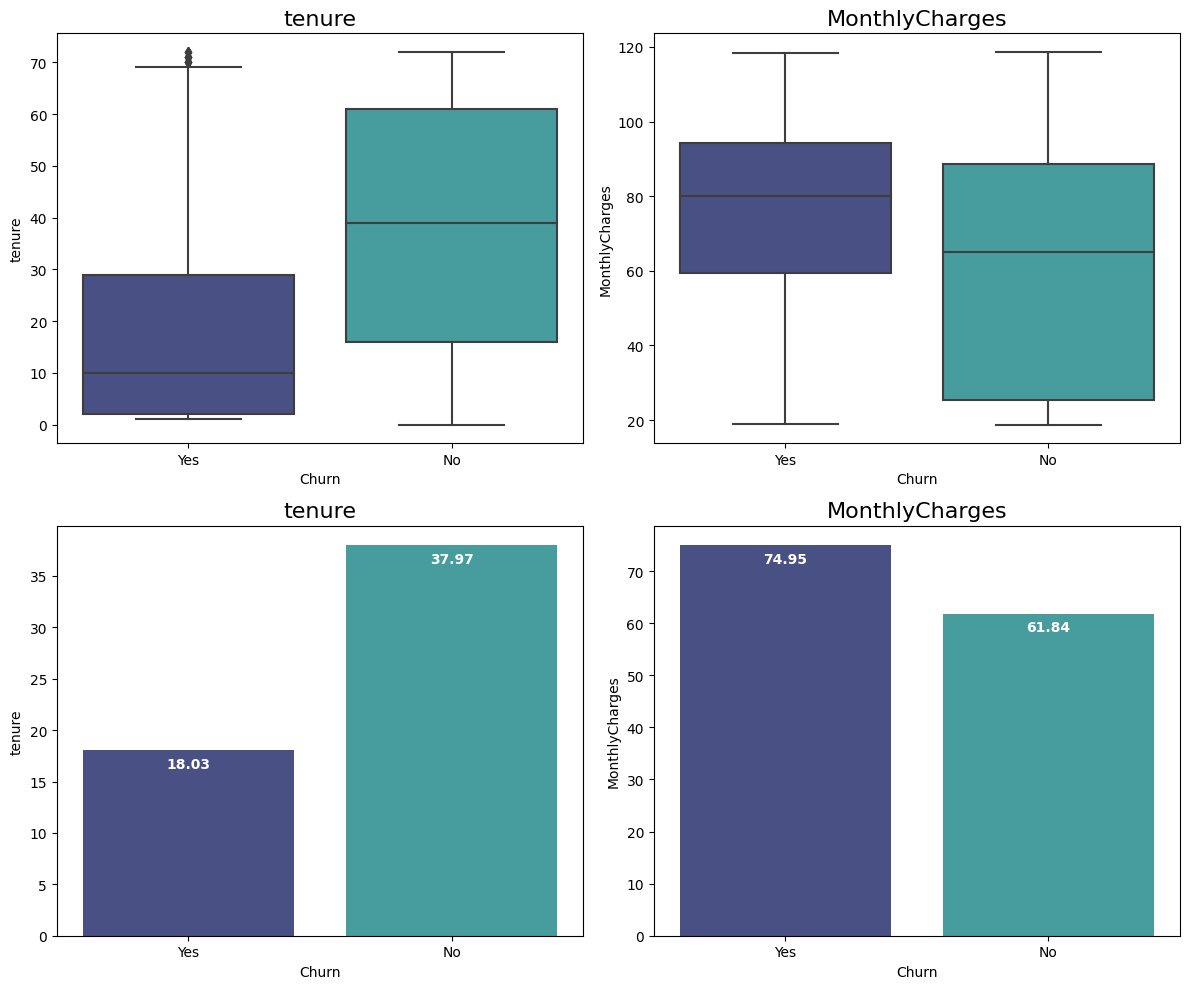

In [79]:
plt.figure(figsize=(12, 10))


# Mengatur posisi subplot
plotnumber = 1

for feature in numerical_features:
    plt.subplot(2,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=df_clean, palette='mako');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

for feature in numerical_features:
    plt.subplot(2, 2, plotnumber)
    sns.barplot(y=feature, x='Churn', data=df_clean, palette='mako', errorbar=None)
    
    # Menambahkan label pada bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, labels=[f'{x:,.2f}' for x in container.datavalues], label_type='edge', padding=-15, color="white", fontweight='bold')
    
    plt.title(feature, fontsize=16)
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.tight_layout()
    plotnumber += 1

plt.show()
    

In [23]:

IQR = df_clean[df_clean['Churn']=='Yes']['tenure'].quantile(0.75) - df_clean[df_clean['Churn']=='Yes']['tenure'].quantile(0.25)
lower_fence = df_clean[df_clean['Churn']=='Yes']['tenure'].quantile(0.25) - 1.5*IQR
upper_fence = df_clean[df_clean['Churn']=='Yes']['tenure'].quantile(0.75) + 1.5*IQR
jumlah_lower = len(df_clean[df_clean['Churn']=='Yes'][df_clean[df_clean['Churn']=='Yes']['tenure']<lower_fence])
jumlah_upper = len(df_clean[df_clean['Churn']=='Yes'][df_clean[df_clean['Churn']=='Yes']['tenure']>upper_fence])

outliers = pd.DataFrame({
    'Feature' : ['tenure'],
    'Lower' : lower_fence,
    'Upper' : upper_fence,
    'n Lower Outliers' : jumlah_lower,
    'n_Upper Outliers' : jumlah_upper,

})

outliers

,Feature,Lower,Upper,n Lower Outliers,n_Upper Outliers
0,tenure,-38.5,69.5,0,13


In [97]:
df_clean.groupby('Churn').agg({'MonthlyCharges':'mean', 'tenure':'mean', 'InternetService':lambda x: x.value_counts().idxmax(), 'Contract':lambda x: x.value_counts().idxmax()})

,MonthlyCharges,tenure,InternetService,Contract
Churn,,,,
No,61.843871,37.971669,DSL,Month-to-month
Yes,74.947244,18.033385,Fiber optic,Month-to-month


Berdasarkan descriptive statistics untuk kolom numerical dapa diketahuhi bahwa :

`tenure` :
- Kategori pelanggan yang `Churn` memiliki rerata jangka waktu tenor terendah yaitu **18.03 Bulan**. Artinya beban biaya *customer accuistion* setiap pelanggan adalah $315/18.03 = $17.47/month
- Kategori pelanggan yang `Churn` memiliki rerata jangka waktu tenor **37.97 Bulan**.
- Sejumlah data teridentifikasi berada di atas upper fence (*outlier*) artinya terdapat juga pelanggan yang `Churn` pada jangka waktu `tenore` diatas 69.5 bulan.
- Terdapat 13 data yang tergolong sebagai *outlier*, jumlah tersebut masih terhitung sangat kecil dibandingkan jumlah keseluruhan data.
- Data *outlier* tersebut kami biarkan karena secara jumlah sedikit dan pada saat pemodelan data *train* maupun test feature tidak dibedakan berdasarkan `Churn`. Namun digunakan sebagai target. Selain itu, kami biarkan agar *machine* mempelajari karakteristik pelanggan seperti apa yang memiliki tenore diatas 69 bulan tetapi 'churn'.

`MonthlyCharges` :
- Kategori pelanggan yang `Churn` cenderung membayar `MonthlyCharge` lebih besar yaitu pada rerata $74.95. Berdasarkan tabel yang kita buat ternyata orang-orang yang *churn* membayar lebih mahal karena mereka cenderung berlangganan Internet kategori *fiber optic* yang memang secara speed lebih baik.
- Kategori pelanggan yang tidak `Churn` cenderung membayar `MonthlyCharge` lebih rendah yaitu pada rerata $61.84. Sedangkan untuk orang-orang yang tidak *churn* mereka berlangganan internet type DSL yang secara kecepatan atau teknologi dibawah *fiber optic*.
- Tidak terdapat outlier pada kategori `MonthlyCharge`.

## **6. Modeling**

### **A. Data Preparation**

#### **Target**

**Change Value**

Pada tahapan *Business Understanding* kita telah menentukan target yaitu kolom `Churn` karena kita ingin memprediksi karakteristik pelangan yang berhenti langganan.

Target :
- 0 : Tidak berhenti berlangganan (No)
- 1 : Berhenti berlangganan (Yes)

In [24]:
df_clean['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df_clean['Churn'] = np.where(df_clean['Churn']== 'Yes', 1, 0)
df_clean['Churn'].unique()

array([1, 0])

**Cek Imbalance**

In [26]:
(df_clean['Churn'].value_counts() / len(df)*100).round(3)

Churn
0    72.312
1    26.126
Name: count, dtype: float64

`Churn` sebagai target termasuk kategori *mild imbalance* karena proporsi **Yes** berada pada rentang [20-40%](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) yaitu sebesar **26.694%**.
Untuk mengatasi ketidakseimbangan distribusi kelas pada data, kita akan mengevaluasi apakah perlu menerapkan metode resampling pada proses pemodelan. Salah satu metode resampling yang akan kita pertimbangkan adalah SMOTE (Synthetic Minority Over-sampling Technique), karena dianggap dapat mengurangi risiko underfitting dan overfitting. Berbeda dengan ROS yang menambahkan data dengan cara menduplikasi data minoritas agar seimbang ataupun RUS yang menghapus data mayoritas, **SMOTE** bekerja dengan membuat sampel sintetis berdasarkan tetangga terdekatnya (k_neighbour).

In [31]:
smote = SMOTE(random_state=0)

#### **Encoding**

**Menentukan Jenis Encoder yang Akan Digunakan**

In [32]:
unique_values = pd.DataFrame([(col, df_clean[col].nunique(), df_clean[col].unique()) for col in cat_feature[:-1]],
                             columns=['Feature', 'Unique Count', 'Unique Values'])

unique_values

,Feature,Unique Count,Unique Values
0,Dependents,2,"[Yes, No]"
1,OnlineSecurity,2,"[No, Yes]"
2,OnlineBackup,2,"[No, Yes]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,2,"[Yes, No]"
5,TechSupport,2,"[Yes, No]"
6,Contract,3,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,2,"[Yes, No]"


**OneHot Encoding :**
- `Dependents`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `PaperlessBilling`

Kolom-kolom tersebut hanya memiliki 2 nilai unik dan kategori **Yes** dan **No** bersifat setara, maka kita akan menggunkan **Onehot Encoding**.

**Ordinal Encoding :**
- `InternetService`
- `Contract`

Kolom-kolom tersebut bersifat ordinal, pada kolom `InternetService` terdapat kategori **No** (tidak berlangganan internet), **DSL** (jaringan internet speed 128-24.000 kbps) dan **fiber optic** (speed up to 10 gbps). Sedangkan pada kolom `Contract` kategori terdiri dari *monthly, one year dam two year*. Oleh karena itu, pendekatan yang lebih tepat adalah menggunakan **Ordinal Encoding** karena fitur-fitur ini memiliki urutan atau tingkatan.


In [33]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping' : {None:0, 'No':1, 'DSL':2, 'Fiber optic':3}},
        {'col':'Contract', 'mapping' : {None:0, 'Month-to-month':1, 'One year':2, 'Two year':3}}
]


In [35]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaperlessBilling']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['InternetService',
                                                      'Contract'],
                                                mapping=[{'col': 'InternetService',
                                                          'data_type': dtype('O'),
                                                          'mapping': None           0
No             1
DSL            2
Fiber optic    3
dtype: int64},
                                                         {'col': 'Contract',
                                                          'data_type': dtype('O'),
                                                          'mapping': None              0
Month-to-month    1
One year          2
Two year          3
dtype: int64}]),
                                 ['InternetService', 'Contract'])])

#### **Scaling**

Pada tahapan Data Analysis kita mengetahui bahwa data yang kita miliki tidak memiliki outlier. Namun ketika mengelompokkan berdasarkan `Churn` diperoleh outlier sebanyak 13 data. Karena jumlah tersebut sangat kecil jika dibandginkan dengan keseluruhan data maka diputuskan untuk menggunakan MinMax Scaler. Meskipun demikian, pada tahap tuning model, kami akan menggunakan metode Robust Scaler agar model yang diperoleh adalah model terbaik dengan tingkat *error* paling rendah.

In [36]:
minmax = MinMaxScaler()
robust = RobustScaler()

### **B. Define Features (X) dan target (y)**

In [37]:
# Features
X = df_clean.drop(columns='Churn')

# target
y = df_clean['Churn']

X.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int32

### **C. Data Splitting**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

### **D. Model Benchmarking**

#### **Define Model**

In [40]:
# logistic Regression
logreg = LogisticRegression()

# k-nearest neighbors
knn = KNeighborsClassifier()

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

# Light GBM 
lgbm = LGBMClassifier()

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# CatBoot
catboost = CatBoostClassifier(verbose=False,random_state=0)

# Scoring
f2_score = make_scorer(fbeta_score, beta=2)
f3_score = make_scorer(fbeta_score, beta=3)

Kita akan menggunakan berbagai model classifier untuk mencari model yang optimal dalam memprediksi *customer churn*, dengan fokus pada meminimalkan tingkat kesalahan sehingga dapat memperoleh model prediksi yang paling akurat.

#### **Cross Validation**

In [61]:
models = [logreg, knn, dt, rf, xgboost, lgbm, adaboost, gradboost, catboost]

list_mean_minmax = []
list_std_minmax = []
list_mean_robust = []
list_std_robust = []

# Minmax Scaler
for algoritma in models:
    if algoritma in [logreg, knn]:
        pipe_model_minmax = Pipeline([
            ('preprocess', transformer),
            ('scaler', minmax),
            ('resampler', smote),
            ('model', algoritma)
        ])
    else:
        pipe_model_minmax = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('model', algoritma)
        ])
    
    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model_minmax,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring=make_scorer(fbeta_score, beta=2)
    )

    list_mean_minmax.append(model_cv.mean())
    list_std_minmax.append(model_cv.std())

# Robust Scaler
for algoritma in models:
    if algoritma in [logreg, knn]:
        pipe_model_robust = Pipeline([
            ('preprocess', transformer),
            ('scaler', robust),
            ('resampler', smote),
            ('model', algoritma)
        ])
    else:
        pipe_model_robust = Pipeline([
            ('preprocess', transformer),
            ('resampler', smote),
            ('model', algoritma)
        ])
    
    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model_robust,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring=make_scorer(fbeta_score, beta=2)
    )

    list_mean_robust.append(model_cv.mean())
    list_std_robust.append(model_cv.std())
pd.DataFrame({
    'model' : ['Logistic Regression' ,'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'AdaBoost', 'GradientBoost', 'CatBoost'],
    'mean f2 minmax' : list_mean_minmax,
    'std f2 minmax' : list_std_minmax,
    'mean f2 robust' : list_mean_robust,
    'std f2 robust' : list_std_robust,
}).sort_values(['mean f2 minmax', 'mean f2 robust'], ascending=False)

[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2131
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,model,mean f2 minmax,std f2 minmax,mean f2 robust,std f2 robust
0,Logistic Regression,0.704120,0.014743,0.706626,0.017759
6,AdaBoost,0.662196,0.017703,0.662196,0.017703
7,GradientBoost,0.634244,0.023736,0.634244,0.023736
1,KNN,0.617373,0.013369,0.628851,0.010007
8,CatBoost,0.603188,0.016683,0.603188,0.016683
5,LightGBM,0.584731,0.023257,0.584731,0.023257
4,XGBoost,0.574009,0.025029,0.574009,0.025029
2,Decision Tree,0.528733,0.029060,0.528733,0.029060
3,Random Forest,0.516634,0.017947,0.516634,0.017947


Berdasarkan perbandingan *Cross Validation* antara *Robust Scaler* dan *Minmax* terlihat jelas bahwa dengan *robust* performa score meningkat 0.2%. Hal ini disebabkan karena jumlah data yang cenderung tidak terdapat *outliers*. Oleh karena itu, kita tetap akan menggunakan *MinMax* saat tuning. Adapun model terbaik *cross validation* adalah Logistic Regression **0.704120** dan AdaBoost **0.662196**. Kedua model menghasil score F2 tertinggi dengan standaard deviasi terendah dibandingkan model *benchmark* lainnya.

#### **Predict Benchmark Model to Test Set and Train Set**

In [148]:
list_f2_score_train = []
list_f2_score_test = []


for algoritma in models:
    if algoritma in [logreg, knn]:
        pipe_model = Pipeline([
            ('preprocess', transformer),
            ('resample',smote),
            ('scaler', minmax),
            ('model', algoritma)
        ])
    else:
        pipe_model = Pipeline([
            ('preprocess', transformer),
            ('resample',smote),
            ('model', algoritma)
        ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    list_f2_score_train.append(score_train)
    list_f2_score_test.append(score_test)

# Perbandingan performa antar model
df_benchmark = pd.DataFrame({'model' : ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'AdaBoost', 'GradientBoost', 'CatBoost'],
             'f2 score (validation set)': list_mean_minmax,
             'f2 score (train set)': list_f2_score_train,
             'f2 score (test set)': list_f2_score_test}).set_index('model').sort_values(by='f2 score (validation set)',ascending=False)
df_benchmark

[LightGBM] [Info] Number of positive: 2852, number of negative: 2852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2150
[LightGBM] [Info] Number of data points in the train set: 5704, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,f2 score (validation set),f2 score (train set),f2 score (test set)
model,,,
Logistic Regression,0.704120,0.711293,0.724842
AdaBoost,0.662196,0.672952,0.690936
GradientBoost,0.634244,0.671045,0.625000
KNN,0.617373,0.731289,0.530361
CatBoost,0.603188,0.740132,0.584772
LightGBM,0.584731,0.756841,0.542359
XGBoost,0.574009,0.841546,0.522388
Decision Tree,0.528733,0.982056,0.439082
Random Forest,0.516634,0.993031,0.458232


Pada tahapan ini kita membandingkan *benchmark model* saat *cross validation* dengan hasil prediksi ke *train set* dan *test set*. Berdasarkan perbandingan tersebut dapat ditarik kesimpulan bahawa 2 model dengan F2 score tertinggi dan stabil (tidak *overfitting*) adalah Logistic Regression dan AdaBoost. Kedua model menghasilkan *score* yang mengalami peningkatan dari *cross validation* ke *train set* kemudian *test set*. Kita akan melakukan *Hyperparameter tuning* untuk kedua model tersebut untuk mendapatkan performa terbaik dari 2 model yang kita pilih.

### **E. Hyperparameter Tuning**

#### **Hyperparameter Tuning : Logistic Regresion**

**Tuning 1 : Randomized Search (n_iter = 100)**

In [197]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [50, 100, 200, 300, 400, 500, 1000, 2500, 5000, 10000],
    'model__fit_intercept': [True, False],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],
    'resampler__k_neighbors': [3, 5, 7, 9, 11, 13],}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define Randomized Search
skfold = StratifiedKFold(n_splits = 5)

random_search_logreg = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=100  
)

In [198]:
# fitting 
random_search_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['InternetService',
                                                                                                    'Contract'],
                                                                                              mapping=[{'col': 'InternetServi...
                                        'model__class_weight': [None,
                                                                'balanced',
                                                                {0: 1, 1: 10},
                                                                {0: 1, 1: 20}],
                                        'model__fit_intercept': [True, False],
                                        'model__max_iter': [50, 100, 200, 300,
                                                            400, 500, 1000,
                                                            2500, 5000, 10000],
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['newton-cg', 'lbfgs',
                                                          'liblinear', 'sag',
                                                          'saga'],
                                        'resampler__k_neighbors': [3, 5, 7, 9,
                                                                   11, 13]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [199]:
random_search_logreg.best_score_

0.7266840910234775

In [201]:
random_search_logreg.best_params_

{'resampler__k_neighbors': 7,
 'model__solver': 'saga',
 'model__penalty': 'l1',
 'model__max_iter': 300,
 'model__fit_intercept': False,
 'model__class_weight': None,
 'model__C': 0.01}

In [326]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg = random_search_logreg.best_estimator_
# fitting
tuned_model_logreg.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7474402730375426

**Tuning 2 : GridSearch**

In [190]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [50, 100, 200, 300, 400, 500, 1000, 2500, 5000, 10000],
    'model__fit_intercept': [True, False],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Penambahan bobot kelas
    'resampler__k_neighbors': [3, 5, 7, 9, 11, 13],}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [191]:
# fitting 
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__class_weight': [None, 'balanced',
                                                 {0: 1, 1: 10}, {0: 1, 1: 20}],
                         'model__fit_intercept': [True, False],
                         'model__max_iter': [50, 100, 200, 300, 400, 500, 1000,
                                             2500, 5000, 10000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sag', 'saga'],
                         'resampler__k_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring=make_scorer(fbeta_score, beta=2))

In [192]:
grid_search_logreg.best_score_

0.7352992211777118

In [193]:
grid_search_logreg.best_params_

{'model__C': 1,
 'model__class_weight': {0: 1, 1: 10},
 'model__fit_intercept': True,
 'model__max_iter': 5000,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [202]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg2 = grid_search_logreg.best_estimator_
# fitting
tuned_model_logreg2.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg2.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7297949336550061

In [319]:
display(random_search_logreg.best_params_, grid_search_logreg.best_params_)

{'resampler__k_neighbors': 7,
 'model__solver': 'saga',
 'model__penalty': 'l1',
 'model__max_iter': 300,
 'model__fit_intercept': False,
 'model__class_weight': None,
 'model__C': 0.01}

{'model__C': 1,
 'model__class_weight': {0: 1, 1: 10},
 'model__fit_intercept': True,
 'model__max_iter': 5000,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

**Insight**

Berdasarkan 2 tuning sebelumnya diperoleh parameter yang konsisten memberikan best score terbaik pada *cross validation*, yaitu :
- 'resampler__k_neighbors': 7
- 'model__solver': 'saga'
- 'model__penalty': 'l1'

Kita akan coba tuning menggunakan GridSearch dengan menggunakan parameter tersebut. Namun kita akan mengubah max_iter, fit_intercept, class_weight dan C. 

**Tuning 3 : GridSearch**

In [320]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['saga'],
    'model__penalty': ['l1'],
    'model__max_iter': [50, 100, 200, 300, 400, 500, 1000, 2500, 5000, 10000],
    'model__fit_intercept': [True, False],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg2 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [321]:
# fitting 
grid_search_logreg2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__class_weight': [None, 'balanced',
                                                 {0: 1, 1: 10}, {0: 1, 1: 20}],
                         'model__fit_intercept': [True, False],
                         'model__max_iter': [50, 100, 200, 300, 400, 500, 1000,
                                             2500, 5000, 10000],
                         'model__penalty': ['l1'], 'model__solver': ['saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [322]:
grid_search_logreg2.best_score_

0.7296604109736002

In [323]:
grid_search_logreg2.best_params_

{'model__C': 100,
 'model__class_weight': {0: 1, 1: 10},
 'model__fit_intercept': True,
 'model__max_iter': 300,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [324]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg3 = grid_search_logreg2.best_estimator_
# fitting
tuned_model_logreg3.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg3.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7188221709006928

**Tuning 4 : GridSearch**

In [44]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['saga'],
    'model__penalty': ['l1'],
    'model__max_iter': [300, 400, 500, 1000, 2500, 5000, 10000],
    'model__fit_intercept': [True, False],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg3 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [45]:
# fitting 
grid_search_logreg3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__class_weight': [None, 'balanced',
                                                 {0: 1, 1: 10}, {0: 1, 1: 20}],
                         'model__fit_intercept': [True, False],
                         'model__max_iter': [300, 400, 500, 1000, 2500, 5000,
                                             10000],
                         'model__penalty': ['l1'], 'model__solver': ['saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [46]:
grid_search_logreg3.best_score_

0.7266840910234775

In [47]:
grid_search_logreg3.best_params_

{'model__C': 0.01,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 300,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [48]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg4 = grid_search_logreg3.best_estimator_
# fitting
tuned_model_logreg4.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg4.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7474402730375426

**Tuning 5 : GridSearch**

In [332]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01],
    'model__solver': ['saga'],
    'model__penalty': ['l1'],
    'model__max_iter': [50, 100, 300, 400, 500, 1000, 2500, 5000],
    'model__fit_intercept': [False],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg4 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [333]:
# fitting 
grid_search_logreg4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01],
                         'model__class_weight': [None, 'balanced',
                                                 {0: 1, 1: 10}, {0: 1, 1: 20}],
                         'model__fit_intercept': [False],
                         'model__max_iter': [50, 100, 300, 400, 500, 1000, 2500,
                                             5000],
                         'model__penalty': ['l1'], 'model__solver': ['saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [334]:
grid_search_logreg4.best_score_

0.7266840910234775

In [335]:
grid_search_logreg4.best_params_

{'model__C': 0.01,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 50,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [336]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg5 = grid_search_logreg4.best_estimator_
# fitting
tuned_model_logreg5.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg5.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7474402730375426

**Tuning 6 : GridSearch**

In [384]:
hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01],
    'model__solver': ['saga'],
    'model__penalty': ['l1'],
    'model__max_iter': [50, 100, 200, 300, 400, 500],
    'model__fit_intercept': [False],
    'model__class_weight': [None, 'balanced'],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg5 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [385]:
# fitting 
grid_search_logreg5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('resampler', SMOTE(random_state=0)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01],
                         'model__class_weight': [None, 'balanced'],
                         'model__fit_intercept': [False],
                         'model__max_iter': [50, 100, 200, 300, 400, 500],
                         'model__penalty': ['l1'], 'model__solver': ['saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [386]:
grid_search_logreg5.best_score_

0.7266840910234775

In [387]:
grid_search_logreg5.best_params_

{'model__C': 0.01,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 50,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [388]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg6 = grid_search_logreg5.best_estimator_
# fitting
tuned_model_logreg6.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg6.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7474402730375426

**Tuning 7 : GridSearch**

In [41]:
hyperparam_space = {
    'model__C': [1, 0.1, 0.01],
    'model__solver': ['saga'],
    'model__penalty': ['l1'],
    'model__max_iter': [50, 100, 200, 300, 400, 500],
    'model__fit_intercept': [False],
    'model__class_weight': [None, 'balanced'],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg6 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [42]:
# fitting 
grid_search_logreg6.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('scaler', MinMaxScaler()),
                                       ('resampler', SMOTE(random_state=0)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [1, 0.1, 0.01],
                         'model__class_weight': [None, 'balanced'],
                         'model__fit_intercept': [False],
                         'model__max_iter': [50, 100, 200, 300, 400, 500],
                         'model__penalty': ['l1'], 'model__solver': ['saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [43]:
grid_search_logreg6.best_score_

0.7266840910234775

In [44]:
grid_search_logreg6.best_params_

{'model__C': 0.01,
 'model__class_weight': None,
 'model__fit_intercept': False,
 'model__max_iter': 50,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [45]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg7 = grid_search_logreg6.best_estimator_
# fitting
tuned_model_logreg7.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg7.predict(X_test)

# evaluate (f2-score)
best_logreg_score = fbeta_score(y_test, y_pred, beta=2)
best_logreg_score

0.7474402730375426

**Tuning 8 : GridSearch**

In [46]:
hyperparam_space = {
    'model__C': [1, 0.1, 0.01],
    'model__solver': ['liblinear', 'saga'],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [50, 100, 200, 300, 400, 500, 1000],
    'model__fit_intercept': [False, True],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 20}],  # Penambahan bobot kelas
    'resampler__k_neighbors': [7]}                                                      

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', smote),
    ('model', logreg)
])

# Define grid Search
skfold = StratifiedKFold(n_splits = 5)

grid_search_logreg8 = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1
)

In [47]:
# fitting 
grid_search_logreg8.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['InternetService',
                                                                                              'Contract'],
                                                                                        mapping=[{'col': 'InternetService',
                                                                                                  'd...
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [1, 0.1, 0.01],
                         'model__class_weight': [None, 'balanced',
                                                 {0: 1, 1: 10}, {0: 1, 1: 20}],
                         'model__fit_intercept': [False, True],
                         'model__max_iter': [50, 100, 200, 300, 400, 500, 1000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga'],
                         'resampler__k_neighbors': [7]},
             scoring=make_scorer(fbeta_score, beta=2))

In [48]:
grid_search_logreg8.best_score_

0.7303769646994758

In [49]:
grid_search_logreg8.best_params_

{'model__C': 1,
 'model__class_weight': {0: 1, 1: 10},
 'model__fit_intercept': True,
 'model__max_iter': 100,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'resampler__k_neighbors': 7}

In [50]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_logreg8 = grid_search_logreg8.best_estimator_
# fitting
tuned_model_logreg8.fit(X_train, y_train)

# predict
y_pred = tuned_model_logreg8.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.716382853787434

**Best Tuning - Logistic Regresion**

Berdasarkan 7 Tuning yang telah kita lakukan diperoleh score tertinggi yaitu **0.747** dengan kombinasi parameter:
- 'model__C': 0.01
- 'model__class_weight': None
- 'model__fit_intercept': False
- 'model__max_iter': 50
- 'model__penalty': 'l1'
- 'model__solver': 'saga'
- 'resampler__k_neighbors': 7

maka kita aka simpan best model logreg tersebut

In [51]:
best_model_logreg = tuned_model_logreg7
best_logreg_score

0.7474402730375426

#### **Hyperparameter Tuning : AdaBoost**

##### **AdaBoost : RandomizedSearch**

**Tuning 1**

In [203]:
# learning rate
learning_rate = list(np.arange(0.05, 1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [204]:
# Benchmark model 1
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost = RandomizedSearchCV(
    estimator=estimator_adaboost, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=100
)

In [205]:
# fitting 
random_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['I...
                                                                 0.23000000000000004,
                                                                 0.24000000000000005,
                                                                 0.25000000000000006,
                                                                 0.26000000000000006,
                                                                 0.27, 0.28,
                                                                 0.29000000000000004,
                                                                 0.30000000000000004,
                                                                 0.31000000000000005,
                                                                 0.32000000000000006,
                                                                 0.33, 0.34, ...],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [206]:
# score f2 terbaik
random_adaboost.best_score_

0.7259650319858985

In [207]:
random_adaboost.best_params_

{'model__n_estimators': 121,
 'model__learning_rate': 0.09000000000000001,
 'model__algorithm': 'SAMME'}

In [258]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost1 = random_adaboost.best_estimator_
# fitting
tuned_model_adaboost1.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost1.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7623169107856191

**Tuning 2**

In [225]:
# learning rate
learning_rate = list(np.arange(0.01, 0.2, 0.01))

# jumlah pohon
n_estimators = list(np.arange(1,121))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [226]:
# Benchmark model 2
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost2 = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost2 = RandomizedSearchCV(
    estimator=estimator_adaboost2, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [227]:
# fitting 
random_adaboost2.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['I...
                                        'model__learning_rate': [0.01, 0.02,
                                                                 0.03, 0.04,
                                                                 0.05,
                                                                 0.060000000000000005,
                                                                 0.06999999999999999,
                                                                 0.08, 0.09,
                                                                 0.09999999999999999,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15000000000000002,
                                                                 0.16, 0.17,
                                                                 0.18000000000000002,
                                                                 0.19],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [228]:
# score f2 terbaik
random_adaboost2.best_score_

0.7315139097690195

In [229]:
random_adaboost2.best_params_

{'model__n_estimators': 27,
 'model__learning_rate': 0.19,
 'model__algorithm': 'SAMME'}

In [231]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost2 = random_adaboost2.best_estimator_
# fitting
tuned_model_adaboost2.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost2.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7590439276485788

**Tuning 3**

In [249]:
# learning rate
learning_rate = list(np.arange(0.01, 0.09000000000000001))

# jumlah pohon
n_estimators = list(np.arange(25, 121))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [250]:
# Benchmark model 2
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost3 = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost3 = RandomizedSearchCV(
    estimator=estimator_adaboost3, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [251]:
# fitting 
random_adaboost3.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['I...
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              AdaBoostClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__algorithm': ['SAMME'],
                                        'model__learning_rate': [0.01],
                                        'model__n_estimators': [25, 26, 27, 28,
                                                                29, 30, 31, 32,
                                                                33, 34, 35, 36,
                                                                37, 38, 39, 40,
                                                                41, 42, 43, 44,
                                                                45, 46, 47, 48,
                                                                49, 50, 51, 52,
                                                                53, 54, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [252]:
# score f2 terbaik
random_adaboost3.best_score_

0.7297958139880848

In [253]:
random_adaboost3.best_params_

{'model__n_estimators': 25,
 'model__learning_rate': 0.01,
 'model__algorithm': 'SAMME'}

In [257]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost3 = random_adaboost3.best_estimator_
# fitting
tuned_model_adaboost3.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost3.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7590439276485788

**Tuning 4**

In [259]:
# learning rate
learning_rate = list(np.arange(0.08, 0.5, 0.01))

# jumlah pohon
n_estimators = list(np.arange(121, 500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [260]:
# Benchmark model 2
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost4 = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost4 = RandomizedSearchCV(
    estimator=estimator_adaboost4, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [261]:
# fitting 
random_adaboost4.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['I...
                                                                 0.2999999999999999,
                                                                 0.3099999999999999,
                                                                 0.3199999999999999,
                                                                 0.3299999999999999,
                                                                 0.3399999999999999,
                                                                 0.34999999999999987,
                                                                 0.3599999999999999,
                                                                 0.3699999999999999, ...],
                                        'model__n_estimators': [121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129,
                                                                130, 131, 132,
                                                                133, 134, 135,
                                                                136, 137, 138,
                                                                139, 140, 141,
                                                                142, 143, 144,
                                                                145, 146, 147,
                                                                148, 149, 150, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [262]:
# score f2 terbaik
random_adaboost4.best_score_

0.7259650319858985

In [263]:
random_adaboost4.best_params_

{'model__n_estimators': 121,
 'model__learning_rate': 0.09,
 'model__algorithm': 'SAMME'}

In [265]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost4 = random_adaboost4.best_estimator_
# fitting
tuned_model_adaboost4.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost4.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7623169107856191

**Insight**

Berdasarkan 4 tuning yang kita lakukan sebelumnya dapat diketahui beberapa parameter yang konsisten menghasilkan best score pada saat *Cross Validation*, yaitu :
- n_estimator berada pada rentang **1-121**
- n_learning_rate berada diangka **0.09**
- algoritma **SAMME**

Selanjutnya kita akan melakukan tuning dengan nilai n_learning rate **0.09** namun kita ubah algoritma dam n_estimator menggunakan GridSearch.

##### **AdaBoost : GridSearch**

**Tuning 5 - Algoritma SAMME.R**

In [53]:
# learning rate
learning_rate = [0.09]

# jumlah pohon
n_estimators = list(np.arange(1,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [54]:
# Benchmark model 2
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost5 = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
grid_adaboost1 = GridSearchCV(
    estimator=estimator_adaboost5, 
    param_grid = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1
)

In [55]:
# fitting 
grid_adaboost1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Interne...
                                                                         ['InternetService',
                                                                          'Contract'])])),
                                       ('resampler', SMOTE(random_state=0)),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME.R'],
                         'model__learning_rate': [0.09],
                         'model__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11, 12, 13, 14, 15, 16, 17, 18,
                                                 19, 20, 21, 22, 23, 24, 25, 26,
                                                 27, 28, 29, 30, ...]},
             scoring=make_scorer(fbeta_score, beta=2))

In [56]:
# score f2 terbaik
grid_adaboost1.best_score_

0.7308177967126578

In [57]:
grid_adaboost1.best_params_

{'model__algorithm': 'SAMME.R',
 'model__learning_rate': 0.09,
 'model__n_estimators': 20}

In [58]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost5 = grid_adaboost1.best_estimator_
# fitting
tuned_model_adaboost5.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost5.predict(X_test)

# evaluate (f2-score)
adabosst5_score = fbeta_score(y_test, y_pred, beta=2)
adabosst5_score

0.7634827810266406

**Tuning 6 - Algoritma SAMME**

In [412]:
# learning rate
learning_rate = [0.09]

# jumlah pohon
n_estimators = list(np.arange(1,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [413]:
# Benchmark model 2
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost6 = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
grid_adaboost2 = GridSearchCV(
    estimator=estimator_adaboost6, 
    param_grid = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = f2_score, 
    n_jobs = -1
)

In [414]:
# fitting 
grid_adaboost2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Interne...
dtype: int64}]),
                                                                         ['InternetService',
                                                                          'Contract'])])),
                                       ('resampler', SMOTE(random_state=0)),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME'],
                         'model__learning_rate': [0.09],
                         'model__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11, 12, 13, 14, 15, 16, 17, 18,
                                                 19, 20, 21, 22, 23, 24, 25, 26,
                                                 27, 28, 29, 30, ...]},
             scoring=make_scorer(fbeta_score, beta=2))

In [415]:
# score f2 terbaik
grid_adaboost2.best_score_

0.7305510645519369

In [416]:
grid_adaboost2.best_params_

{'model__algorithm': 'SAMME',
 'model__learning_rate': 0.09,
 'model__n_estimators': 65}

In [417]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model_adaboost6 = grid_adaboost2.best_estimator_
# fitting
tuned_model_adaboost6.fit(X_train, y_train)

# predict
y_pred = tuned_model_adaboost6.predict(X_test)

# evaluate (f2-score)
fbeta_score(y_test, y_pred, beta=2)

0.7590439276485788

**Best Tuning - AdaBoost**

Berdasarkan 6 Tuning yang telah kita lakukan diperoleh score tertinggi yaitu **0.7634** dengan kombinasi parameter:
- 'algorithm': 'SAMME.R'
- 'learning_rate': 0.09
- 'n_estimators': 20

maka kita akan simpan best model AdaBoost tersebut

In [59]:
best_model_adaboost = grid_adaboost1.best_estimator_
best_model_adaboost_score = adabosst5_score
best_model_adaboost_score

0.7634827810266406

#### **Choose Best Model**

Berdasarkan hyperparameter tuning untuk 2 model yang kita pilih yaitu **Logistic Regresion** dan **AdaBoost** dapat kita bandingkan score benchmark dan hasil tuning sebagai berikut:

In [65]:
df_best_model = pd.DataFrame({'Predict to' : ['Train Set', 'Train Set', 'Test Set', 'Test Set'],
                              'Score' : ['Benchmark', 'Tuning', 'Benchmark', 'Tuning'],
    'Logistic Regression' : [list(df_benchmark[['f2 score (train set)']].iloc[0])[0], grid_search_logreg6.best_score_, list(df_benchmark[['f2 score (test set)']].iloc[0])[0], best_logreg_score],
    'AdaBoost' : [list(df_benchmark[['f2 score (train set)']].iloc[1])[0], grid_adaboost1.best_score_, list(df_benchmark[['f2 score (test set)']].iloc[1])[0], best_model_adaboost_score]
}).set_index(['Predict to', 'Score'])
df_best_model

Logistic Regression  AdaBoost
Predict to Score                                   
Train Set  Benchmark             0.711293  0.672952
           Tuning                0.726684  0.730818
Test Set   Benchmark             0.724842  0.690936
           Tuning                0.747440  0.763483

Berdasarkan perbandingan antara *benchmark model* dan *tuning* dari kedua model kita, diketahui bahwa terjadi peningkatan performa untuk setiap model baik dari *train set* maupun *test set*. AdaBoost adalah model yang performanya meningkat signifikan setelah dilakukan *tuning* pada *test set* performa meningkat tajam dari **0.690936** menjadi **0.763483**.

### **F. Feature Importances and Coefficient Regression**

#### **Coefficient Regression - Logistic Regression**

In [598]:
feature_onehot = list(best_model_adaboost['preprocess'].transformers_[0][1].get_feature_names_out())
feature_ordinal = list(best_model_adaboost['preprocess'].transformers_[1][2])
feature_remainder = list(X.columns[best_model_adaboost['preprocess'].transformers_[2][2]])
feature_names = feature_onehot + feature_ordinal + feature_remainder
feature_names

['Dependents_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'PaperlessBilling_Yes',
 'InternetService',
 'Contract',
 'tenure',
 'MonthlyCharges']

In [604]:
coeficients = best_model_logreg['model'].coef_
coeficient_dict = dict(zip(feature_names, coeficients.flatten()))

In [606]:
df_coef_reg = pd.DataFrame(list(coeficient_dict.items()), columns=['Feature', 'Coefficient']).sort_values('Coefficient', ascending=False)
df_coef_reg

,Feature,Coefficient
6,InternetService,1.114914
5,PaperlessBilling_Yes,0.104180
2,OnlineBackup_Yes,0.000000
3,DeviceProtection_Yes,0.000000
9,MonthlyCharges,0.000000
4,TechSupport_Yes,-0.009947
1,OnlineSecurity_Yes,-0.070250
0,Dependents_Yes,-0.098833
8,tenure,-1.161559
7,Contract,-1.603145


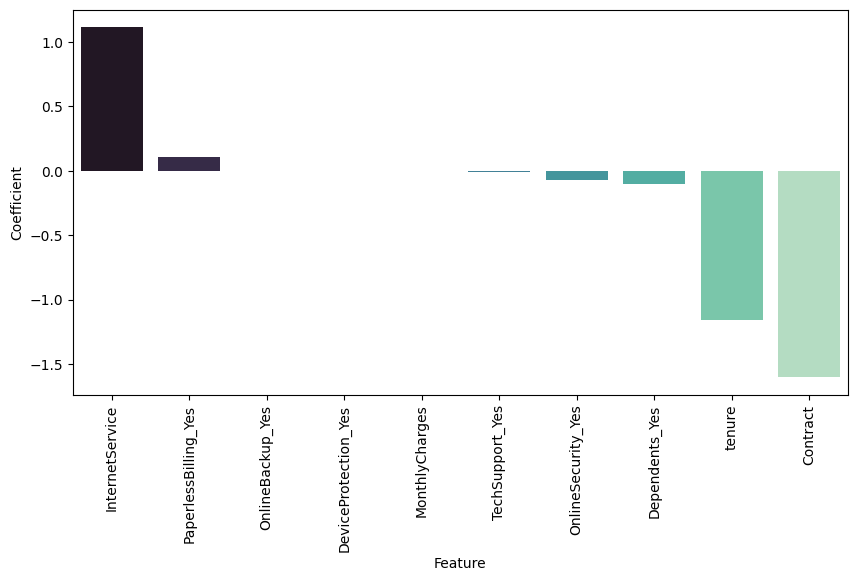

In [618]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_coef_reg, x='Feature', y='Coefficient', palette='mako')
plt.xticks(rotation=90)
plt.show()

**Interpretasi**

InternetService (1.114914):

- Interpretasi: Pelanggan yang menggunakan layanan internet (fiber optic, DSL) memiliki kecenderungan yang kuat untuk berhenti berlangganan.
- Implikasi: Layanan internet tampaknya menjadi faktor yang signifikan dalam keputusan pelanggan untuk berhenti berlangganan.

PaperlessBilling_Yes (0.104180):

- Interpretasi: Pelanggan yang menggunakan PaperlessBilling lebih cenderung untuk berhenti berlangganan, namun koefisiennya sangat kecil, menunjukkan korelasi yang sangat lemah.
- Implikasi: Pengaruh PaperlessBilling terhadap keputusan pelanggan tidak terlalu signifikan, namun orang yang menggunakan PaperlessBiliing cenderung untuk *churn*.

OnlineBackup_Yes (0.000000):

- Interpretasi: Tidak memiliki pengaruh terhadap peluang pelanggan berhenti berlangganan.
- Implikasi: Penggunaan atau tidaknya OnlineBackup tidak tampak mempengaruhi keputusan pelanggan untuk berhenti berlangganan.

DeviceProtection_Yes (0.000000):

- Interpretasi: Tidak memiliki pengaruh terhadap peluang pelanggan berhenti berlangganan.
- Implikasi: Kehadiran atau ketidakhadiran DeviceProtection tidak tampak memiliki dampak signifikan pada keputusan pelanggan.

MonthlyCharges (0.000000):

- Interpretasi: Tidak memiliki pengaruh terhadap peluang pelanggan berhenti berlangganan.
- Implikasi: Besarnya tagihan bulanan (MonthlyCharges) tidak tampak mempengaruhi keputusan pelanggan untuk berhenti berlangganan.

TechSupport_Yes (-0.009947):

- Interpretasi: Pelanggan yang menggunakan dukungan teknis (TechSupport) memiliki kecenderungan untuk tidak berhenti berlangganan, namun nilainya mendekati nol, menunjukkan pengaruh yang hampir tidak signifikan.
- Implikasi: Meskipun ada kecenderungan negatif, TechSupport mungkin tidak menjadi faktor kritis dalam mempertahankan pelanggan.

OnlineSecurity_Yes (-0.070250):

- Interpretasi: Pelanggan yang menggunakan (OnlineSecurity) cenderung memiliki peluang lebih rendah untuk berhenti berlangganan, namun nilainya mendekati nol, menunjukkan pengaruh yang hampir tidak signifikan.
- Implikasi: Faktor keamanan online (OnlineSecurity) mungkin memiliki dampak kecil terhadap retensi pelanggan.

Dependents_Yes (-0.098833):

- Interpretasi: Pelanggan yang memiliki tanggungan (Dependents) cenderung memiliki peluang lebih rendah untuk berhenti berlangganan, namun nilainya mendekati nol, menunjukkan pengaruh yang hampir tidak signifikan.
- Implikasi: Keberadaan tanggungan mungkin memiliki dampak kecil pada keputusan pelanggan untuk tetap berlangganan.

tenure (-1.161559):

- Interpretasi: Semakin lama pelanggan tetap berlangganan (tenure), semakin rendah peluang mereka untuk berhenti berlangganan. Nilai negatif menunjukkan hubungan invers.
- Implikasi: Lama berlangganan (tenure) adalah faktor kritis, dengan pelanggan yang berlangganan lebih lama cenderung lebih retain.

Contract (-1.603145):

- Interpretasi: Pelanggan dengan kontrak jangka panjang (two-year contract) memiliki peluang lebih rendah untuk berhenti berlangganan dibandingkan dengan pelanggan dengan kontrak bulanan (month-to-month).
- Implikasi: Kontrak jangka panjang (Contract) adalah faktor penting dalam mempertahankan pelanggan, dengan pelanggan jangka waktu kontrak lebih lama memiliki kecenderungan lebih tinggi untuk tetap berlangganan.

#### **Feature Importance - AdaBoost**

In [555]:
best_model_adaboost = grid_adaboost1.best_estimator_

In [57]:
feature_onehot = list(best_model_adaboost['preprocess'].transformers_[0][1].get_feature_names_out())
feature_ordinal = list(best_model_adaboost['preprocess'].transformers_[1][2])
feature_remainder = list(X.columns[best_model_adaboost['preprocess'].transformers_[2][2]])
feature_names = feature_onehot + feature_ordinal + feature_remainder
feature_names

['Dependents_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'PaperlessBilling_Yes',
 'InternetService',
 'Contract',
 'tenure',
 'MonthlyCharges']

In [58]:
feature_importance = best_model_adaboost['model'].feature_importances_
feature_imp_dict = dict(zip(feature_names, feature_importance.flatten()))

In [59]:
df_importances = pd.DataFrame(list(feature_imp_dict.items()), columns=['Feature', 'Coefficient']).sort_values('Coefficient', ascending=False)
df_importances

,Feature,Coefficient
7,Contract,0.55
6,InternetService,0.20
5,PaperlessBilling_Yes,0.10
8,tenure,0.10
0,Dependents_Yes,0.05
1,OnlineSecurity_Yes,0.00
2,OnlineBackup_Yes,0.00
3,DeviceProtection_Yes,0.00
4,TechSupport_Yes,0.00
9,MonthlyCharges,0.00


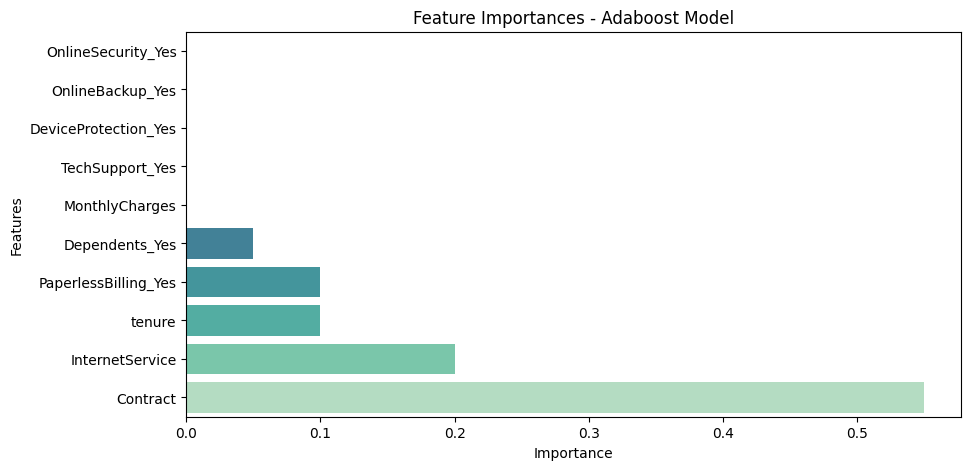

In [87]:
coef1 = pd.Series(best_model_adaboost['model'].feature_importances_, feature_names).sort_values(ascending = True)
plt.figure(figsize=(10, 5))
sns.barplot(x=coef1.values, y=coef1.index, palette="mako")
plt.title('Feature Importances - Adaboost Model')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

Berikut adalah interpretasi untuk feature importances untuk model AdaBoost :

- Contract (0.55):

    *Feature* ini memiliki kontribusi tertinggi terhadap prediksi bahwa pelanggan akan berhenti berlangganan. Artinya fitur ini paling sering digunakan untuk menentukan pelanggan akan *churn* atau tidak. Dari data analysis yang kita lakukan sebelumnya diketahui semakin lama jangka waktu *contract*(*one-year, two-year*) semakin *retain* pelanggan.

- InternetService (0.20):

    Jenis layanan internet yang digunakan oleh pelanggan (No internet Serviece, fiber optic, DSL) juga memiliki kontribusi yang moderate terhadap prediksi berhenti berlangganan. Namun dibandingkan **PaperlessBilling** dan **tenure** fitur ini lebih sering digunakan untuk pengambilan keputusan dalam model AdaBoost. Pada tahapan data analysis diketahui orang-orang yang berlangganan InternetService (fiber optic, DSL) memiliki kemungkinan lebih besar untuk *churn*.

- PaperlessBilling_Yes dan tenure (0.10):

    Fitur-fitur ini memiliki kontribusi yang rendah terhadap prediksi berhenti berlangganan (*churn*). Artinya frekuensi pengambilan keputusan dalam menentukan pelanggan akan *churn* atau tidak pada fitur ini sama banyaknya. Namun untuk orang-orang yang menggunakan PaperlessBilling lebih cenderung untuk *churn* sesuai dengan tahapan data analysis yang kita lakukan. Untuk tenure semakin lama jangka waktunya semakin retain pelanggan.

- Dependents_Yes (0.05):

    Keberadaan tanggungan (dependents) juga memiliki kontribusi namun sangat rendah, *feature* ini hampir jarang digunakan dalam menentukan pelanggan akan *churn* atau tidak dibanding 4 fitur sebelumnya. Pada tahapan Data analysis kita ketahui bahwa orang-orang yang tidak memiliki tanggungan cenderung lebih mudah untuk *churn*.
    
- Fitur-fitur lainnya (*OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, MonthlyCharges*) merupakan *feature* yang sangat tidak penting terhadap prediksi *churn*.

### **G. Confusion Matrix**

#### **Logistic Regresion**

In [67]:
# Pipeline
best_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', SMOTE(k_neighbors=7, random_state=0)),
    ('model', LogisticRegression(C=0.01, fit_intercept=False, max_iter=50, penalty='l1', solver='saga', random_state=0))
])
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)
fbeta_score(y_test, y_pred_best_logreg, beta=2)

0.7474402730375426

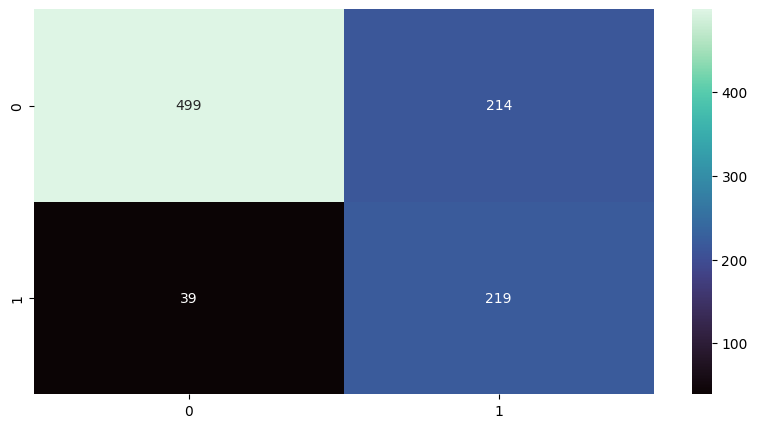

In [95]:
plt.figure(figsize=(10,5))
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_best_logreg), annot=True, fmt=".0f", cmap=cmap)
plt.show()

Berdasarkan *confusion matrix* model **Logistic Regression** pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon pelanggan yang aktualnya *churn* dan diprediksi akan *churn* (***True Positive***) : **219 orang**
- Jumlah calon pelanggan yang aktualnya *churn* tetapi diprediksi tidak akan *churn* (***False Negative***) : **39 orang**
- Jumlah calon pelanggan yang aktualnya tidak *churn* dan diprediksi tidak akan *churn* (***True Negative***) : **499 orang**
- Jumlah calon pelanggan yang aktualnya tidak *churn* tetapi diprediksi akan *churn* (***False Positive***) : **214 orang**
- Jumlah calon pelanggan yang diprediksi *churn* : **TP + FP = 433 orang**
- Jumlah calon pelanggan yang diprediksi tidak *churn* : **TN + FN = 538 orang**

In [126]:
pd.DataFrame({
    'Metrics' : ['Recall', 'Precision', 'F1', 'Accuracy'],
    'Score' : [recall_score(y_test, y_pred_best_logreg), precision_score(y_test, y_pred_best_logreg), f1_score(y_test, y_pred_best_logreg), accuracy_score(y_test, y_pred_best_logreg)]
})

,Metrics,Score
0,Recall,0.848837
1,Precision,0.505774
2,F1,0.633864
3,Accuracy,0.739444


Sebagai perbandingan saat kita menggunakan metrics lain untuk mengukur performa model Logistic Regresion yang sudah kita *tuning*, diperoleh hasil sebagai berikut :

- **Recall (Sensitivity): 0.848837**
    
    Dari 258 orang yang diklasifikasikan churn, 84.8837% atau 219 orang berhasil diprediksi dengan tepat sebagai churn.

- **Precision: 0.505774**

    Dari 433 orang yang diprediksi churn, hanya 50.5774% atau 219 orang yang benar-benar churn.

- **F1 Score: 0.633864**
    
    F1 Score dihitung dengan menggabungkan Precision dan Recall, memberikan gambaran keseluruhan tentang keseimbangan antara akurasi prediksi model Logistic Regression yang telah dituning. F1 Score bernilai 0.633864, menunjukkan keseimbangan yang baik antara Precision dan Recall.

- **Accuracy: 0.739444**
    
    Akurasi model adalah 73.9444%, di mana 718 dari 971 prediksi benar-benar tepat.

#### **AdaBoost**

In [69]:
best_adaboost = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote), 
    ('model', AdaBoostClassifier(learning_rate=0.09, n_estimators=20, random_state=0))
    ])
best_adaboost.fit(X_train, y_train)
y_pred_best_adaboost = best_adaboost.predict(X_test)
fbeta_score(y_test, y_pred_best_adaboost, beta=2)

0.7634827810266406

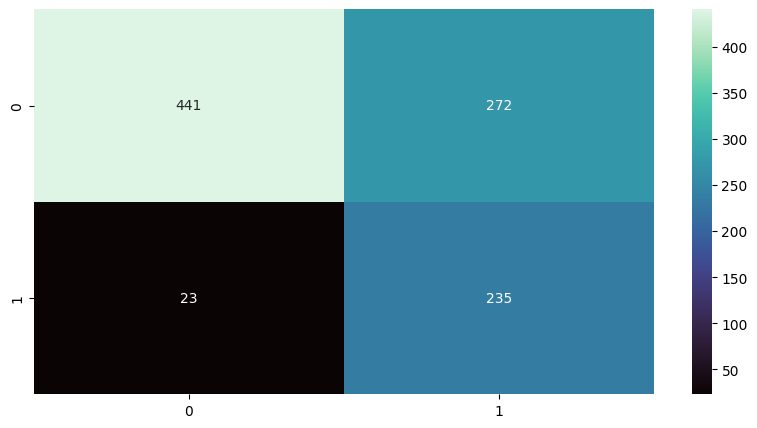

In [75]:
plt.figure(figsize=(10,5))
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(confusion_matrix(y_test, y_pred_best_adaboost), annot=True, fmt=".0f", cmap=cmap)
plt.show()

Berdasarkan *confusion matrix* model **AdaBoost** pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon pelanggan yang aktualnya *churn* dan diprediksi akan *churn* (***True Positive***) : **235 orang**
- Jumlah calon pelanggan yang aktualnya *churn* tetapi diprediksi tidak akan *churn* (***False Negative***) : **23 orang**
- Jumlah calon pelanggan yang aktualnya tidak *churn* dan diprediksi tidak akan *churn* (***True Negative***) : **441 orang**
- Jumlah calon pelanggan yang aktualnya tidak *churn* tetapi diprediksi akan *churn* (***False Positive)*** : **272 orang**
- Jumlah calon pelanggan yang diprediksi *churn* : **TP + FP = 507 orang**
- Jumlah calon pelanggan yang diprediksi tidak *churn* : **TN + FN = 464 orang**

In [128]:
pd.DataFrame({
    'Metrics' : ['Recall', 'Precision', 'F1', 'Accuracy'],
    'Score' : [recall_score(y_test, y_pred_best_adaboost), precision_score(y_test, y_pred_best_adaboost), f1_score(y_test, y_pred_best_adaboost), accuracy_score(y_test, y_pred_best_adaboost)]
})

,Metrics,Score
0,Recall,0.910853
1,Precision,0.463511
2,F1,0.614379
3,Accuracy,0.696189


Sebagai perbandingan saat kita menggunakan metrics lain untuk mengukur performa model AdaBoost yang sudah kita *tuning*, diperoleh hasil sebagai berikut :

- **Recall (Sensitivity): 0.910853**
    
    Dari 258 orang yang diklasifikasikan churn, 91.0853% atau 235 orang berhasil diprediksi dengan tepat sebagai churn.

- **Precision: 0.463511**
    
    Dari 507 orang yang diprediksi churn, hanya 46.3511% atau 235 orang yang benar-benar churn.

- **F1 Score: 0.614379**
    
    Model memiliki F1 Score sebesar 0.614379, menunjukkan keseimbangan yang kurang baik antara Recall dan Precision. Jika dibandingkan dengan F1 score pada model Logistic Regression, keseimbangan antara recall dan precision lebih rendah.

- **Accuracy: 0.696189**
    
    Akurasi model adalah 69.6189%, di mana hanya 676 dari 971 prediksi yang benar-benar tepat.


### **H. Cost Benefit Analysis**

Pada tahapan Business Understanding dan Data analysis kita mendapatkan informasi dari data yang kita punya maupun dari berbagai sumber. Berdasarkan informasi tersebut kita dapat menghitung dampak biaya jika kita tidak menggunakan model *machine learning* maupun menggunakannya sebagai berikut :

***cost calculation based on data and refferences***
- Rerata tenure untuk pelanggan *churn* adalah **18.03 bulan**.
- Biaya biaya *customer accuistion* adalah **$315.**
- Maka Beban biaya *customer accuistion* setiap pelanggan adalah $315/18.03 = **$17.47/month**.
- Biaya retensi --> $17.47/5 = **$3.494** per bulan per pelanggan.
- Rerata MonthlyCharges customer --> **$65.32**
- Potensi kerugian akibat kehilangan pelanggan (Churn) --> $65.32 + $17.47 + $3.494 = **$86.284**.

***Total potential customer without machine learning***
- calon pelanggan yang kita berikan program retensi = **971 orang** (jumlah calon konsumen pada data *test set*)
- calon pelanggan yang aktualnya churn = **258 orang** (jumlah aktual *churn* konsumen pada data *test set*)

***Cost Estimation***
**971 orang** x **$3.494** per bulan per pelanggan + **258 orang** x **$17.47** per bulan per pelanggan = **$7899.93 per bulan**

Potensi kerugian yang akan kita terima yaitu **$7899.93 per bulan** jika kita tidak menggunakan machine learning.

---
Manfaat menggunakan machine learning salah satunya kita dapat mendistribusikan biaya retensi pada pelanggan yang diprediksi *churn* saja. Untuk lebih jelasnya akan kita simulasikan perhitungannya berdasarkan tiap model Adaboost dan Logistic Regression yang sudah kita kembangkan.

**Logistic Regression**

*total potential churn customer*
- calon pelanggan yang kita berikan program retensi = TP + FP = 219 + 214 = **433 orang**
- calon pelanggan yang aktualnya *churn* = **258 orang**

*Cost Estimation*
**433 orang** x **$3.494** per bulan per pelanggan + **258 orang** x **$17.47** per bulan per pelanggan = **$6020.162 per bulan**

Maka kerugiannya sekitar **$6020.162 per bulan**

*Potential Lost Deflation*
Penurunan Potential Loss = **$7899.93** - **$6020.162** = **$1879.768 per bulan**

**% Penurunan** = $1879.768 / $7899.93 x 100 = **23.79%**

Dengan demikian, dengan menggunakan Logistic Regression, terdapat potensi penurunan biaya sekitar **23.79%**. Ini menunjukkan *benefit* dari penerapan model machine learning dalam strategi retensi pelanggan.

---
**AdaBoost**

*total potential churn customer*
- calon pelanggan yang kita berikan program retensi = TP + FP = 272 + 235 = **507 orang**
- calon pelanggan yang aktualnya *churn* = **258 orang**

*Cost Estimation*
**507 orang** x **$3.494** per bulan per pelanggan + **258 orang** x **$17.47** per bulan per pelanggan = **$6278.718 per bulan**

Maka kerugiannya sekitar **$6278.718 per bulan**

*Potential Lost Deflation*
Penurunan Potential Loss = **$7899.93** - **$6278.718** = **$1621.212 per bulan**

**% Penurunan** = $1621.212 / $7899.93 x 100 = **20.521%**

Dengan demikian, dengan menggunakan Logistic Regression, terdapat potensi penurunan biaya sekitar **20.521%**. Ini menunjukkan *benefit* dari penerapan model machine learning dalam strategi retensi pelanggan.

Selisih *Potential Lost Deflation* AdaBoost vs Logistic Regression diperoleh nilai sebesar **$258.556 per bulan**. Berdasarkan *Potential Lost Deflation* Model Logistic Regression merupakan model yang paling baik karena persentase penurunan lost akibat biaya retensi lebih tinggi 3%.

---
Untuk mengetahui mana model yang lebih cocok dalam meminimalisir kerugian, kita akan membandingkan pengaruhnya terhadap prediksi *False Positif* dan *False Negatif*

**Logistic Regression**

- FP = 214
- FN = 39

Biaya Retensi = **214 orang** x **$3.494** per bulan/orang = **$747.716 per bulan** (total kerugian akibat salah memberikan program retensi)

Biaya Accuistion = **39 orang** x **$17.47** per bulan/orang =  **$681.33 per bulan** (total kerugian akibat tidak memberikan program retensi)

Total kerugian = **$747.716 per bulan** + **$681.33 per bulan** = **$1429.046 per bulan**

**AdaBoost**

- FP = 272
- FN = 23

Biaya Retensi = **272 orang** x **$3.494** per bulan/orang = **$950.368 per bulan** (total kerugian akibat salah memberikan program retensi)

Biaya Accuistion = **23 orang** x **$17.47** per bulan/orang =  **$401.81 per bulan** (total kerugian akibat tidak memberikan program retensi)

Total kerugian = **$950.368 per bulan** + **$401.81 per bulan** = **$1352.178 per bulan**

Selisih kerugian biaya retensi dan *accuistion* pada Model AdaBoost dan LogisticRegression adalah **$76.88**. Artinya model AdaBoost dapat membantu perusahaan menghemat **$76.88** akibat salah sasaran pada program retensi.

---
Berdasarkan *cost calculation* diatas kita dapat menarik kesimpulan sebagai berikut :
- Dengan menggunakan Machine learning kita akan menghemat *cost retention* sebesar **23.79%** untuk Logistic Regression dan **20.521%** untuk AdaBoost.
- Dengan menggunakan model Logistic Regression alih-alih AdaBoost kita dapat menghemat **$258.556** - **$76.88** = **$181.676**. Artinya walaupun secara F2 Score AdaBoost lebih besar tetapi model logistic Regression dapat menurunkan False Positif lebih baik dibanding AdaBoost.
- Berdasarkan perbandingan F1 Score diatas memang untuk Logistic Regression memang lebih seimbang dalam memperkecil False Positive dan False Negatif, terlihat dari score-nya yang lebih besar dibandingkan model AdaBoost. Jika kita lihat dampak yang diberikan dari *cost estimation* diatas model Logistic Regression membantu perusahaan dalam menurunkan kerugian akibat biaya Retensi dan Accuistion dengan performa yang lebih baik dari AdaBoost.


### **I. Model Limitation**

In [98]:
df_clean.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


Dalam melakukan permodelan, perlu diperhatikan batasan rentang data yang digunakan. Model ini hanya berlaku jika data yang digunakan berada pada interval berikut :

- `Dependents` dan `PaperlessBilling` dengan pilihan **Yes** atau **No**.
- `tenure` pada rentang **0** hingga **72 bulan**.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` dengan pilihan **Yes**, **No**, atau **No internet service**.
- `MonthlyCharges` pada interval **$18.8** hingga **$118.65**.
- `Contract` dengan pilihan **Month-to-month**, **One year**, dan **Two Year**.
- `InternetService` dengan pilihan **DSL**, **Fiber Optic**, dan **No**.

Penggunaan model di luar interval tersebut dapat mengakibatkan hasil prediksi tidak akurat atau tidak dapat diandalkan.

## **7. Conclusion and Recommendation**

### **A. Conclusion**

#### **Model**
Berdasarkan permodelan yang kita lakukan dapat diperoleh kesimpulan sebagai berikut  :

- Pada tahap *cross validation* kita memperoleh 2 model yang paling stabil baik pada train set dan test set namun menghasilkan score terbaik, yaitu  : **Logistic Regression** dan **AdaBoost**

- Setelah melalui proses hyperparameter tuning pada model Logistic Regression dan AdaBoost diperoleh score terbaik dengan parameter sebagai berikut :
    * Logistic Regression --> 0.7474402730375426

        Parameter : 
        
            - 'C': 0.01
            - 'class_weight': None
            - 'fit_intercept': False
            - 'max_iter': 50
            - 'penalty': 'l1'
            - 'solver': 'saga'
            - 'k_neighbors': 7

    * AdaBoost --> 0.7634827810266406
    
        Parameter : 
            
            - 'algorithm': 'SAMME'
            - 'learning_rate': 0.09
            - 'model__n_estimators': 65

- Dari best model Logistic Regression diperoleh interpretasi dari koefisien regressi untuk setiap *features* sebagai berikut :

    * `InternetService` : Pelanggan dengan layanan internet (fiber optic, DSL) cenderung berhenti berlangganan.
    * `PaperlessBilling` : Penggunaan PaperlessBilling berkorelasi lemah dengan peluang pelanggan untuk berhenti berlangganan.
    * Fitur Tambahan (`OnlineBackup`, `DeviceProtection`, `MonthlyCharges`) : Tidak ada pengaruh signifikan dari fitur-fitur ini terhadap peluang berhenti berlangganan.
    * Dukungan Teknis (`TechSupport`), Keamanan Online (`OnlineSecurity`), dan Tanggungan (`Dependents`) : Pengaruh kecil hingga tidak signifikan terhadap peluang pelanggan berhenti berlangganan.
    * Lama Berlangganan (`tenure`) : Hubungan invers; semakin lama pelanggan berlangganan, semakin rendah peluang berhenti.
    * Jenis Kontrak (`Contract`) : Pelanggan dengan kontrak jangka panjang memiliki peluang lebih rendah untuk berhenti berlangganan.
    <br><br>
- Dari best model AdaBoost diperoleh *features importances* yang berpengaruh dalam pengambilan keputusan model tersebut, yaitu:

    * `Contract`: Kontrak jangka panjang memiliki kontribusi tertinggi dalam memprediksi *churn*, menunjukkan pelanggan dengan kontrak lebih lama cenderung tetap setia.
    * `InternetService` : Jenis layanan internet, terutama fiber optic dan DSL, berperan signifikan dalam memprediksi *churn*, penggunaan layanan tersebut lebih cenderung untuk *churn*.
    * `PaperlessBilling` dan `tenure` : Penggunaan PaperlessBilling dan tenure memiliki kontribusi moderat, dimana pengguna PaperlessBilling lebih cenderung untuk *churn*, sementara pelanggan dengan tenure lebih lama cenderung tetap berlangganan.
    * `Dependents` : Keberadaan tanggungan (*dependents*) memberikan kontribusi rendah dalam prediksi *churn*, menunjukkan pelanggan tanpa tanggungan lebih cenderung untuk *churn*.
    * Fitur-fitur lainnya (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `MonthlyCharges`): Fitur-fitur ini dianggap tidak penting dalam prediksi *churn* karena kontribusinya mendekati nol.
    <br><br>
- Walaupun AdaBoost menghasilkan F2 score lebih baik, jika kita bandingkan metrics F1 Score diperoleh kesimpulan bahwa Logistic Regression lebih seimbang dalam memperkecil False Positive dan False Negatif, terlihat dari score-nya yang lebih besar dibandingkan model AdaBoost. 
   * Logistic Regression --> F1 Score = 0.633864
        - **False Positif = 214**
        - True Positif  = 235
        - **False Negatif = 39**
        - True Negatif  = 441
        <br><br>
   * AdaBoost --> F1 Score = 0.614379
        - **False Positif = 272**
        - True Positif  = 299
        - **False Negatif = 23**
        - True Negatif  = 419
    Terlihat bahwa model logistic Regression memberikan penurunan yang lebih seimbang dibandingkan AdaBoost. Nilai False Negatifnya lebih tinggi namun dapat menurunkan false negatif lebih signifikan.

**Business**

- **Cost Retention** :
   
    - Model Logistic Regression menghemat cost retention sebesar **23.79%**.
    - Model AdaBoost menghemat cost retention sebesar **20.521%**.
<br><br>
- **Pemilihan Model terhadap Dampak Finansial** :
    - Menggunakan Logistic Regression daripada AdaBoost dapat menghemat **$181.676**.
    - Walaupun F2 Score AdaBoost lebih besar, Logistic Regression lebih baik dalam menurunkan False Positif.
<br><br>
- **F1 Score dan Dampak Finansial** :
    - Logistic Regression menunjukkan keseimbangan yang lebih baik dalam memperkecil False Positive dan False Negative.
    - Dengan performa yang lebih baik, Logistic Regression membantu perusahaan menurunkan kerugian akibat biaya Retensi dan Akuisisi.

Meskipun AdaBoost memiliki F2 Score yang lebih besar, keputusan menggunakan Logistic Regression didasarkan pada analisis dampak finansial yang lebih positif dan kemampuannya dalam menurunkan False Positif.

### **B. Recommendation**

#### **Model**

- **Pilihan Model :**
    
    Pilih model Logistic Regression sebagai model utama untuk prediksi *churn*. Meskipun AdaBoost memiliki F2 score yang lebih tinggi, Logistic Regression menunjukkan keseimbangan yang lebih baik antara Precision dan Recall, serta mampu menurunkan False Positif dengan lebih baik.

- **Features Penting :**

    - Fokus pada fitur-fitur dengan pengaruh tinggi dalam kedua model, seperti jenis kontrak (`Contract`), layanan internet (`InternetService`), penggunaan `PaperlessBilling`, dan lama berlangganan (`tenure`). Ini dapat membantu perusahaan mengidentifikasi pelanggan yang berpotensi *churn* dan mengambil tindakan preventif.
    - Menambahkan *features* seperti survey kepuasan pelanggan, rerata income ataupun usia untuk mendapatkan informasi mendalam mengenai kriteria pelanggan, agar prediksi semakin akurat 
<br><br>
- **Monitoring Reguler :**

    Lakukan pemantauan reguler terhadap performa model dan aktualisasi data. Pemodelan prediksi *churn* perlu diperbarui secara berkala untuk memastikan relevansi dan akurasi 
    yang berkelanjutan.

- **Kombinasi Model :**

    Pertimbangkan untuk menggabungkan hasil dari kedua model (Logistic Regression dan AdaBoost) jika memungkinkan atau lakukan tuning pada model lain dengan best score pada saat *cross validation* memberikan performa yang stabil. Kemudian coba kombinasi ketiganya menggunakan metode *voting* atau *stacking*.

- **Pengoptimalan Model Lanjutan :**

    Melakukan pengoptimalan model secara berkala dengan mengeksplorasi algoritma dan parameter yang berbeda dapat meningkatkan performa model lebih lanjut.

#### **Business**

- **Penyesuaian Strategi Pemasaran :**

    - Lakukan analisis mendalam tentang preferensi dan kebutuhan pelanggan. Sesuaikan strategi pemasaran dengan data demografis dan perilaku pelanggan yang diperoleh dari model.
    - Fokus pada promosi dan penawaran yang lebih menarik untuk pelanggan dengan kontrak jangka pendek atau yang menggunakan layanan internet tertentu.
<br><br>
- **Strategi Retensi :**
    
    - Tingkatkan upaya retensi untuk pelanggan dengan kontrak jangka pendek dan jenis layanan internet tertentu, terutama *fiber optic* dan *DSL*.
    - Pertimbangkan insentif atau penawaran khusus untuk pelanggan dengan lama berlangganan yang lebih pendek dan yang menggunakan `PaperlessBilling`.
<br><br>
- **Komunikasi dan Interaksi :**

    Komunikasikan temuan dan rekomendasi dengan departemen lain, terutama tim terkait yang bertugas terhadap pelayanan customer dan pemasaran. Interaksi antar tim dapat meningkatkan pemahaman tentang pelanggan dan meningkatkan efektivitas strategi.

- **Pengoptimalan Struktur Kontrak :**

    Evaluasi dan pertimbangkan untuk menawarkan insentif atau diskon kepada pelanggan yang setuju untuk kontrak jangka panjang. Ini dapat membantu meningkatkan retensi pelanggan dalam jangka waktu yang lebih lama.

- **Inovasi Layanan dan Paket :**

    - Rancang inovasi layanan atau paket yang menarik bagi pelanggan, seperti bundling layanan tambahan atau penawaran khusus untuk pelanggan setia.
    - Pantau tren industri dan sesuaikan penawaran agar tetap kompetitif di pasar.
<br><br>    
- **Edukasi Pelanggan :**

    Lakukan upaya edukasi kepada pelanggan tentang manfaat dan nilai tambah yang mereka dapatkan dari layanan perusahaan. Peningkatan pemahaman pelanggan dapat membantu meningkatkan loyalitas.

- **Pelatihan Tim *Marketing* dan *Customer Service* :**

    Berikan pelatihan kepada tim penjualan dan layanan pelanggan untuk memahami dengan lebih baik preferensi dan kebutuhan pelanggan. Tim yang terlatih dengan baik dapat memberikan layanan yang lebih baik.

- **Investasi dalam Teknologi :**

    Pertimbangkan untuk menginvestasikan dalam teknologi yang dapat meningkatkan efisiensi operasional dan memberikan pengalaman pelanggan yang lebih baik, seperti sistem 
    manajemen hubungan pelanggan (CRM) yang canggih.

## **Save Final Model**

In [112]:
import pickle

**AdaBoost**

In [115]:
# fit
best_model_adaboost.fit(X, y)

# save with pickle
pickle.dump(best_model_adaboost, open('best_model_adaboost.sav', 'wb'))

**Logistic Regresion**

In [116]:
# fit
best_model_logreg.fit(X, y)

# save with pickle
pickle.dump(best_model_logreg, open('best_model_logreg.sav', 'wb'))